In [321]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import json
import math
import copy
import pandas as pd
from pymop.factory import get_problem, get_uniform_weights
from utils import matr_add_diff_size, extract_median_front
from pymoo.factory import get_problem, get_reference_directions
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  

In [322]:
def data_from_json(name):
    data = []
    #Each line in the json is an evolutionary run
    with open(name, 'r') as fp:

        for levels_json in fp:
            if levels_json != "\n":
                di = json.loads(levels_json)
                data.append(di)
    return data

def plot_mat_3d(mats, title, sup_title, save_fig = False):
    fig = plt.figure()
    fig.suptitle(sup_title, fontsize=16)
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(title)
    for mat in mats:
        xs = mat[:, 0]

        ys = mat[:, 1]

        zs = mat[:, 2]

        ax.scatter(xs,ys,zs)
    if save_fig:
        plt.savefig(f"{title}-{sup_title}.png")
    plt.show()
    
def plot_mat_2d_lines(mats, title, sup_title):
    plt.rcParams["figure.figsize"] = [7.50, 3.50]
    plt.rcParams["figure.autolayout"] = True
    fig = plt.figure()
    fig.suptitle(sup_title, fontsize=16)
    ax = fig.add_subplot(111)
    ax.set_title(title)
    for j in range(len(mats[1])):
        x = [0, 2*mats[1][j, 0]]
        y = [0, 2*mats[1][j, 1]]
        #ax.scatter(x,y,z)
        ax.plot(x, y, color='red')

    for mat in mats:


        xs = mat[:, 0]

        ys = mat[:, 1]


        ax.scatter(xs,ys, s=10)
    plt.show()
    
def plot_mat_2d(mats, title, sup_title, labels = [], save_fig = False):
    # plt.rcParams["figure.figsize"] = [7.50, 3.50]
    # plt.rcParams["figure.autolayout"] = True
    fig = plt.figure()
    fig.suptitle(sup_title, fontsize=16)
    ax = fig.add_subplot(111)
    ax.set_title(title)

    for i, mat in enumerate(mats):
        if len(labels) != 0 and mat.shape[0] == 1:
            ax.scatter(mat[:,0], mat[:,1])
            ax.annotate(labels[i], (mat[:,0], mat[:,1]))
        elif len(labels) != 0:
            xs = mat[:, 0]
            ys = mat[:, 1]
            ax.scatter(xs, ys, label = labels[i] )

        else:
            xs = mat[:, 0]
            ys = mat[:, 1]
            ax.scatter(xs, ys)

    ax.legend()
    if save_fig:
        plt.savefig(f"{title}-{sup_title}.png")
    plt.show()
    
def multiplot_2d(mats, title, sup_title, x_axis_label, y_axis_label, labels = [], save_fig = False):
    # plt.rcParams["figure.figsize"] = [7.50, 3.50]
    # plt.rcParams["figure.autolayout"] = True
    fig = plt.figure()
    fig.suptitle(sup_title, fontsize=16)
    ax = fig.add_subplot(111)
    ax.set_title(title)

    for i, mat in enumerate(mats):
        if len(labels) != 0:
            xs = mat[:, 0]
            ys = mat[:, 1]
            ax.plot(xs, ys, label = labels[i] )

        else:
            xs = mat[:, 0]
            ys = mat[:, 1]
            ax.plot(xs, ys)

    ax.legend()
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    if save_fig:
        plt.savefig(f"{title}-{sup_title}.png")
    plt.show()

In [323]:
data1 = data_from_json('analytics.json')

In [324]:

merged_data = {}
merged_data_pareto = {}
#initializing values of dictionary
for k1 in data1[0].keys():
    merged_data[k1] = []
    merged_data_pareto[k1] = []
for k1 in data1[0].keys():
    for i in range(len(data1)):
        merged_data[k1] += [data1[i][k1]["hyper_volumes"]]
        merged_data_pareto[k1] += [data1[i][k1]["fronts"][-1]]
    merged_data[k1] = np.array(merged_data[k1])

In [325]:
medians = {}
for k in merged_data.keys():
    x = np.arange(1, merged_data[k].shape[1] + 1)    
    x = x.reshape(x.shape[0], 1)
    minimum = np.min(merged_data[k], axis = 0)
    minimum = minimum.reshape(minimum.shape[0], 1)
    minimum = np.concatenate((x, minimum), axis = 1)
    maximum = np.max(merged_data[k], axis = 0)
    maximum = maximum.reshape(maximum.shape[0], 1)
    maximum = np.concatenate((x, maximum), axis = 1)
    median = np.median(merged_data[k], axis = 0)
    median = median.reshape(median.shape[0], 1)
    median = np.concatenate((x, median), axis = 1)
    medians[k] = [minimum, median, maximum]

<IPython.core.display.Javascript object>


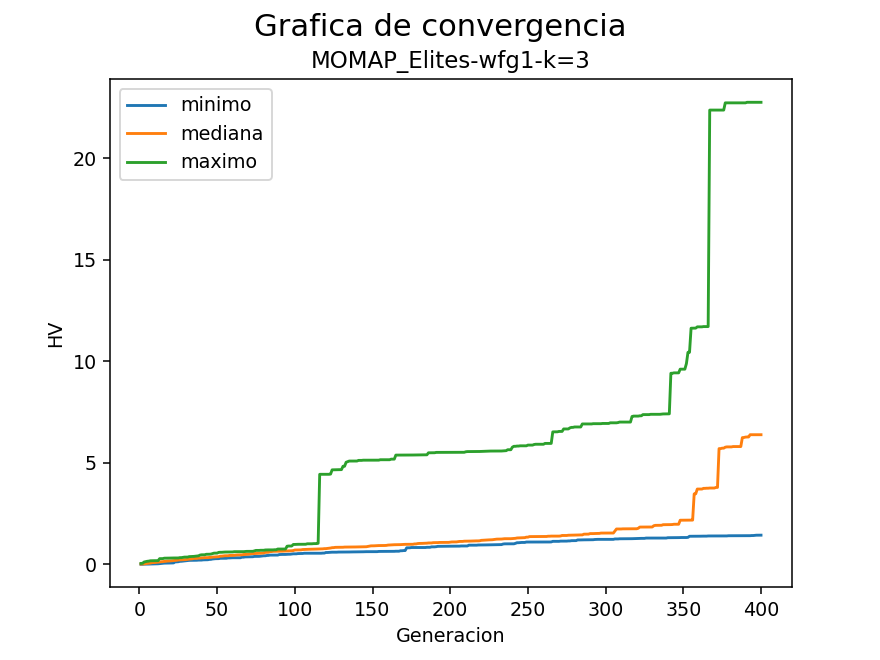

<IPython.core.display.Javascript object>


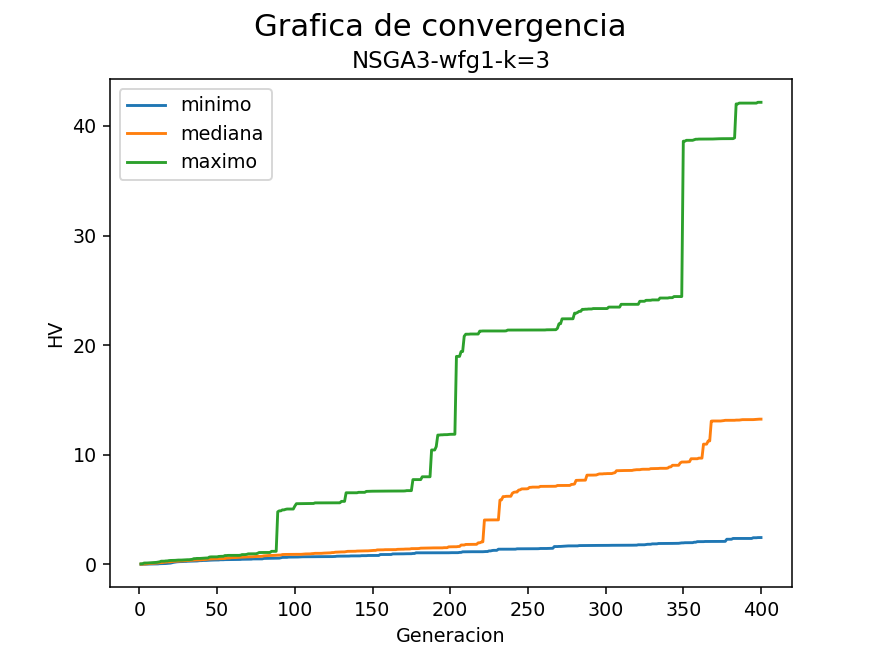

<IPython.core.display.Javascript object>


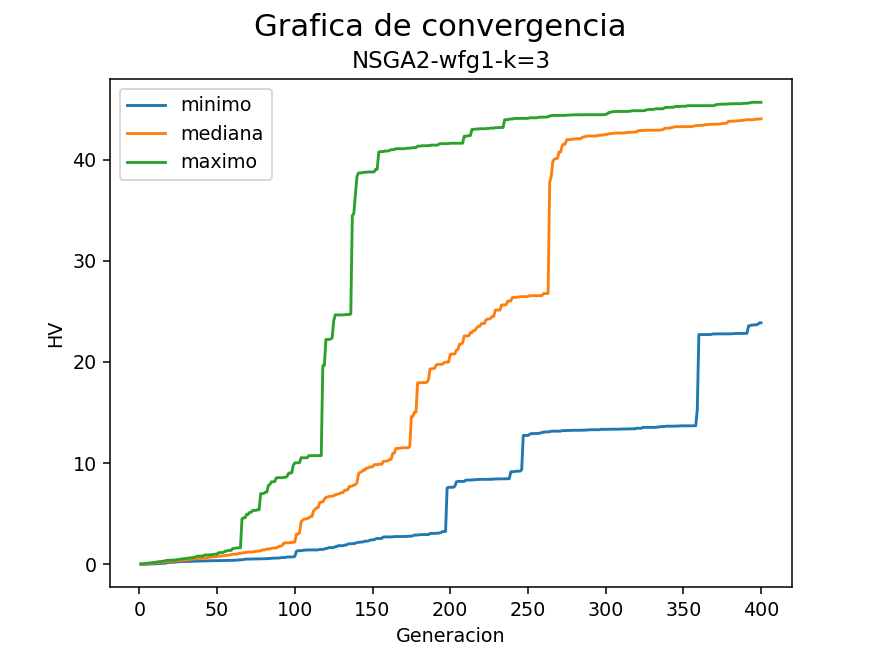

<IPython.core.display.Javascript object>


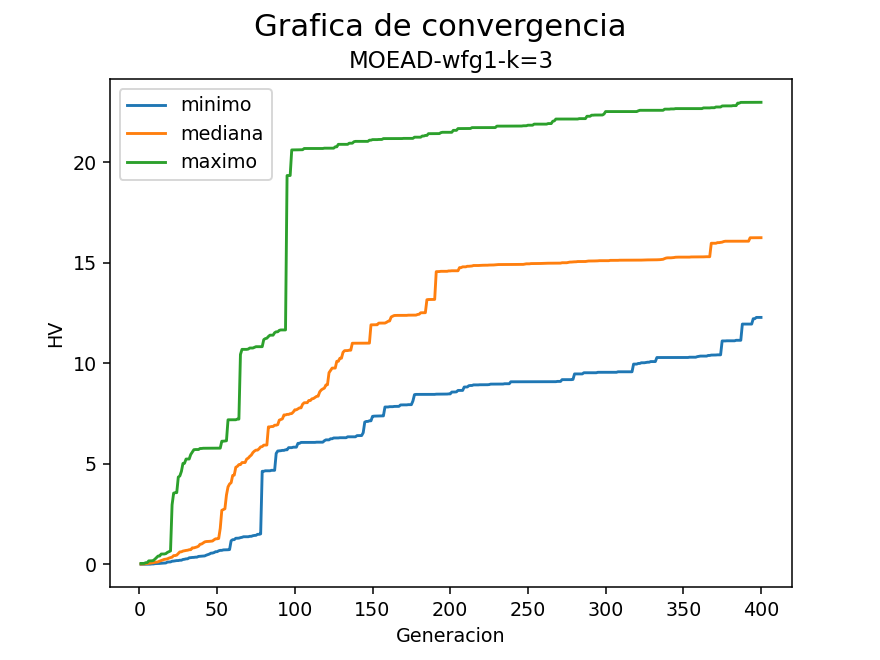

<IPython.core.display.Javascript object>


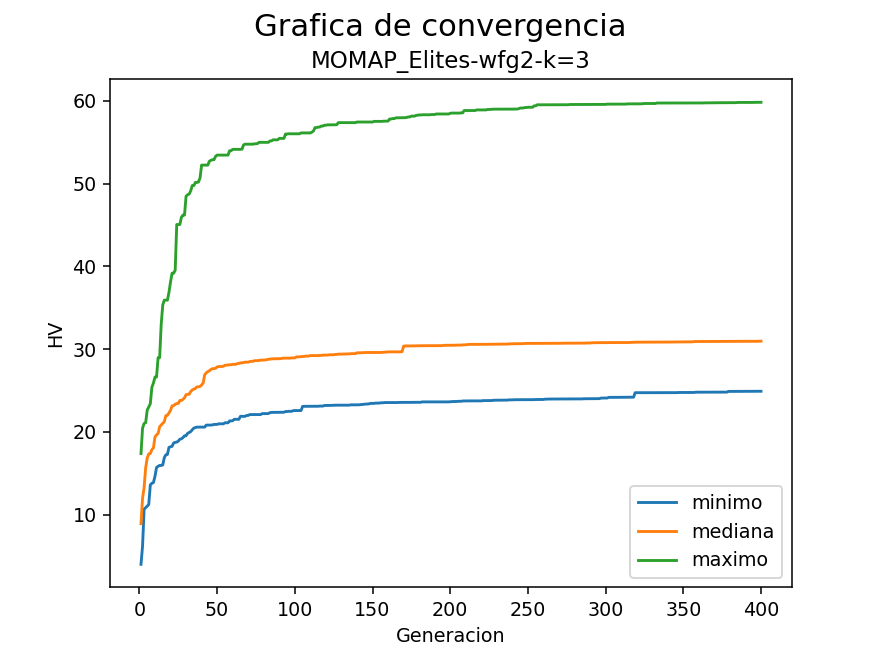

<IPython.core.display.Javascript object>


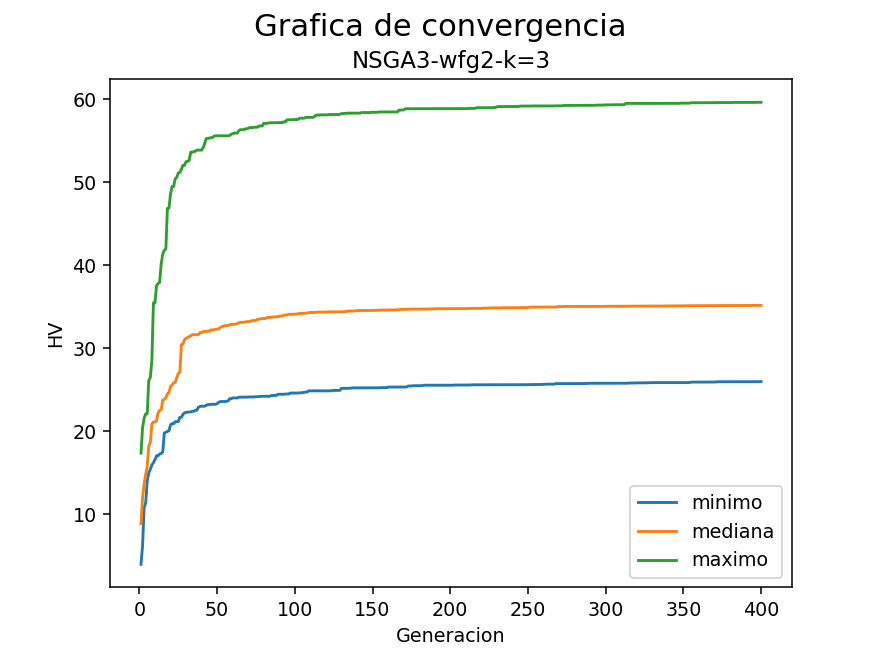

<IPython.core.display.Javascript object>


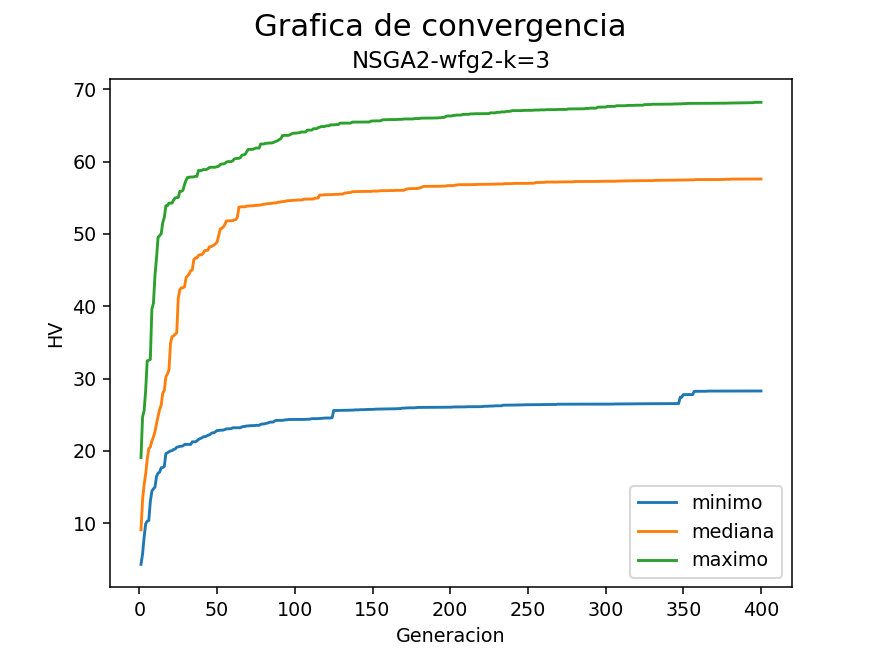

<IPython.core.display.Javascript object>


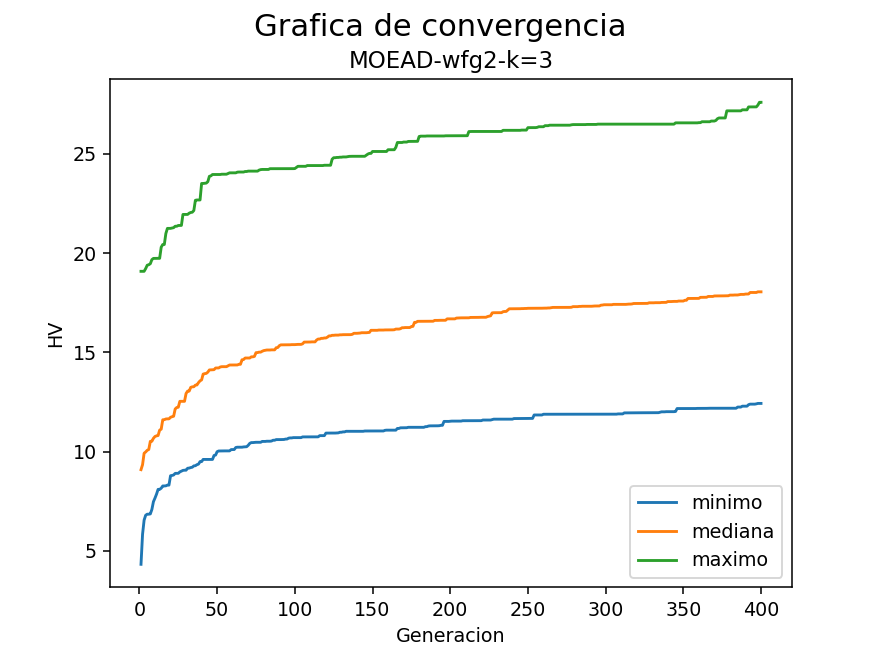

<IPython.core.display.Javascript object>


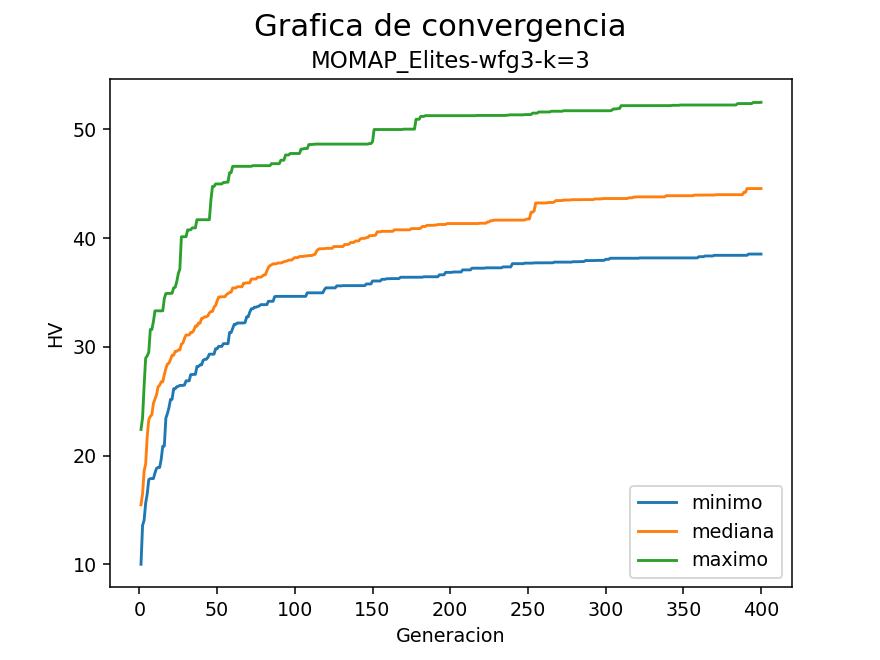

<IPython.core.display.Javascript object>


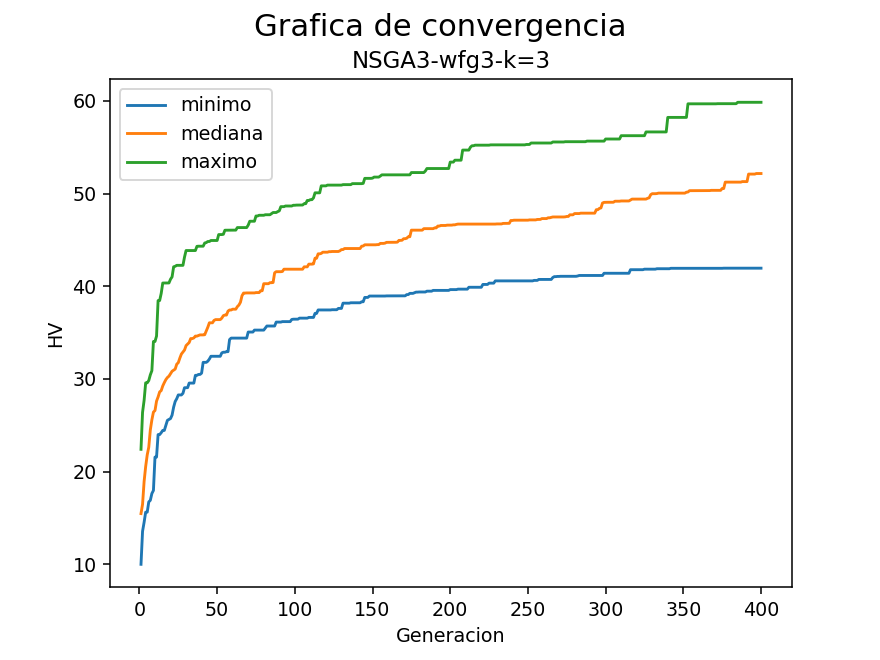

<IPython.core.display.Javascript object>


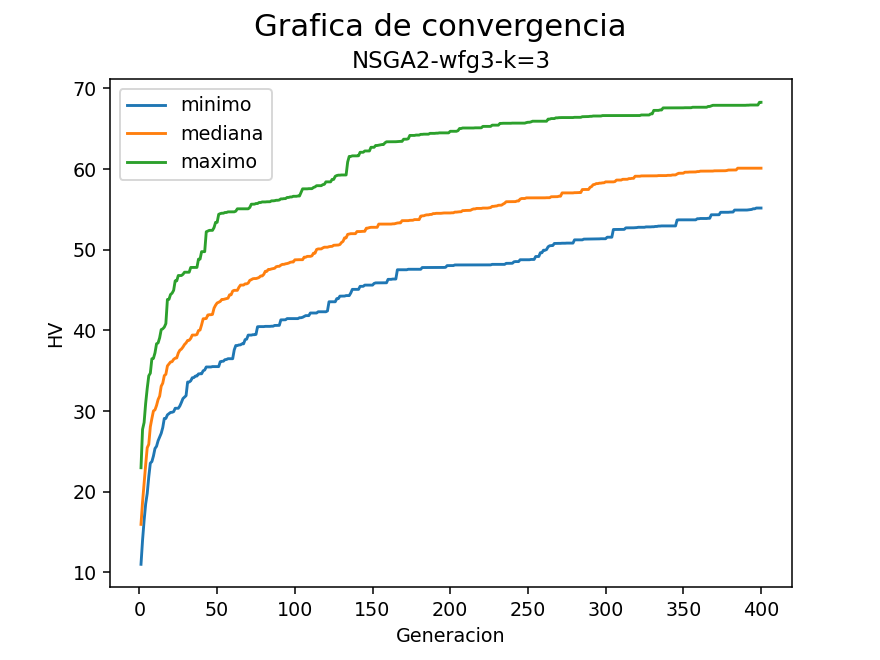

<IPython.core.display.Javascript object>


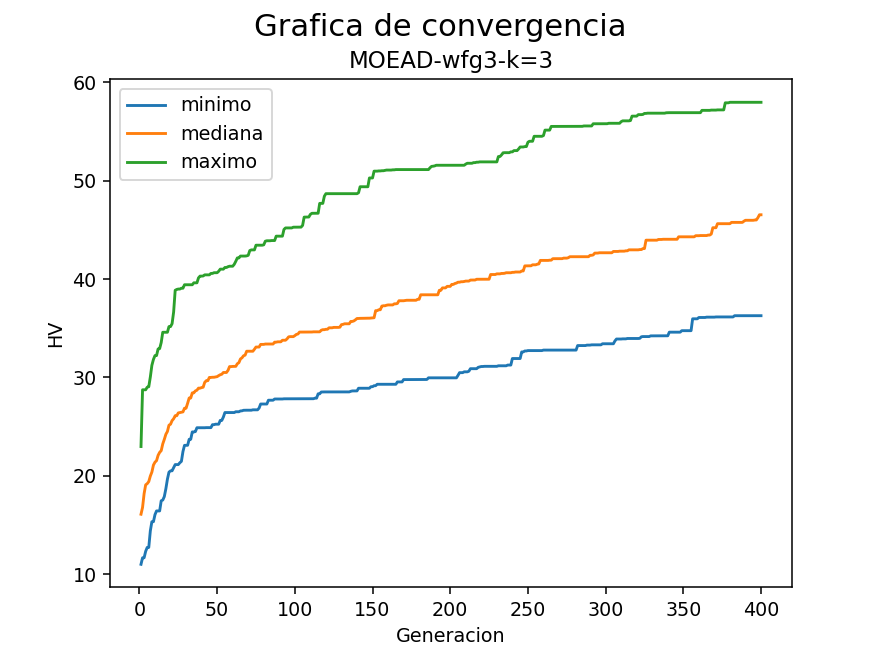

<IPython.core.display.Javascript object>


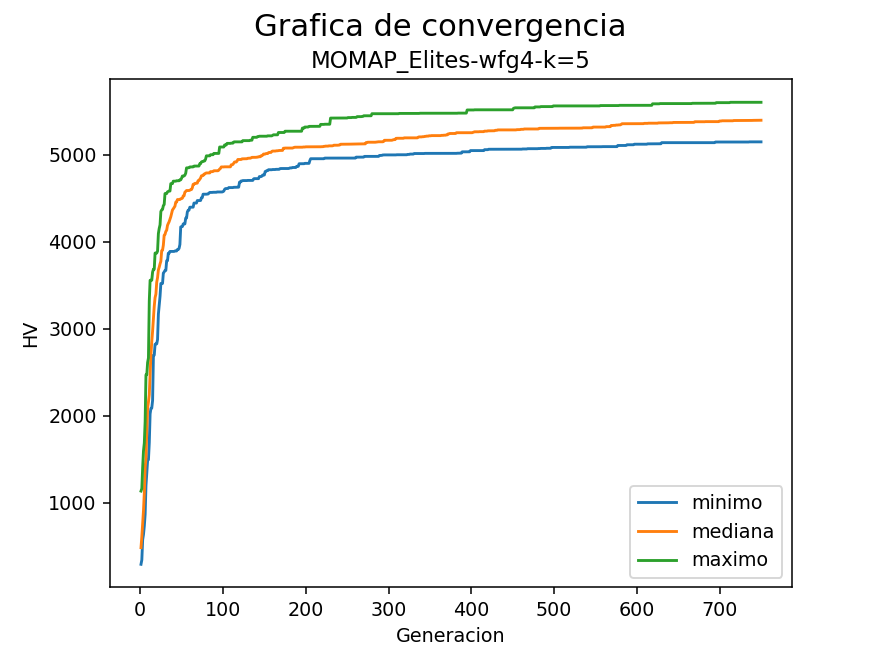

<IPython.core.display.Javascript object>


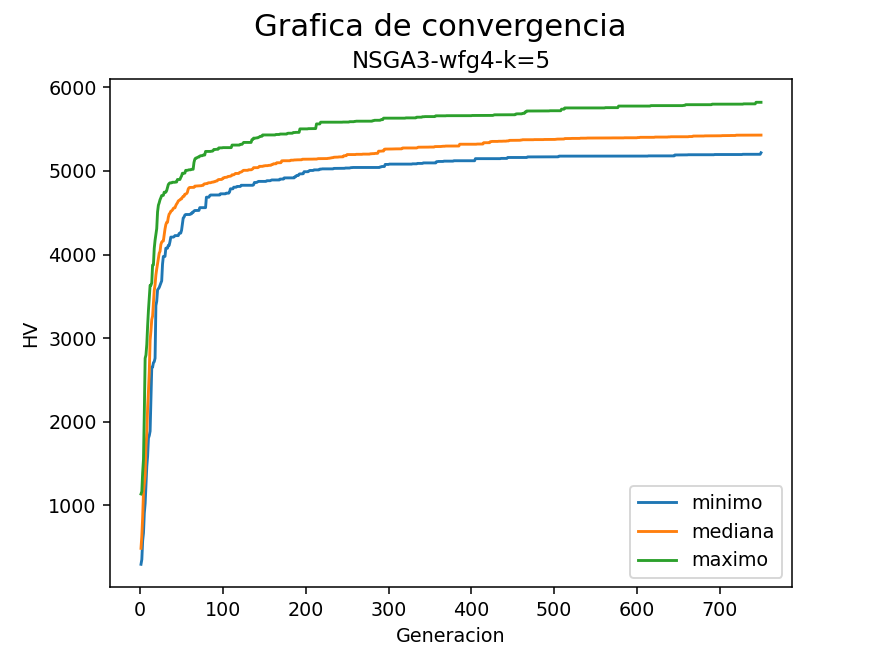

<IPython.core.display.Javascript object>


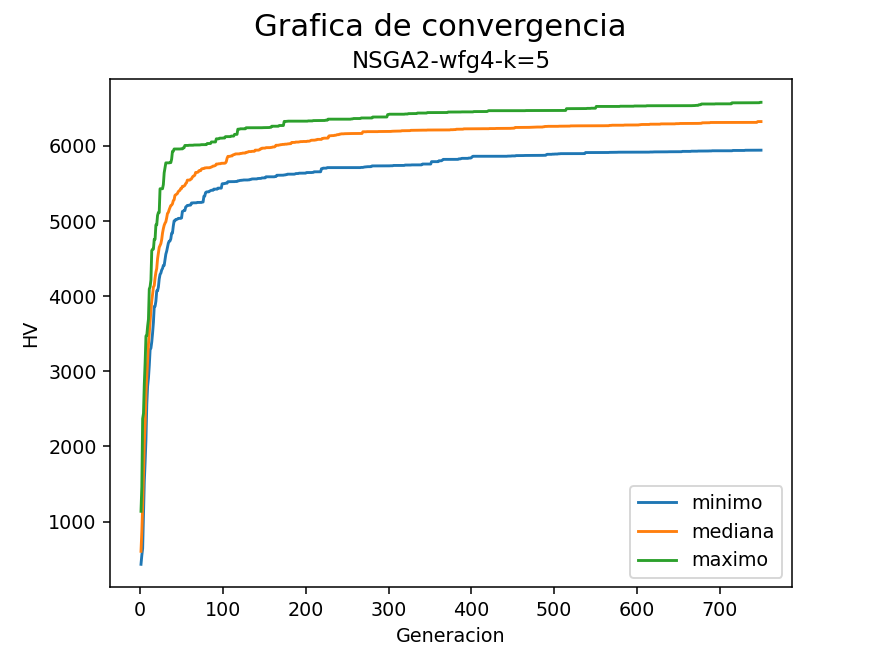

<IPython.core.display.Javascript object>


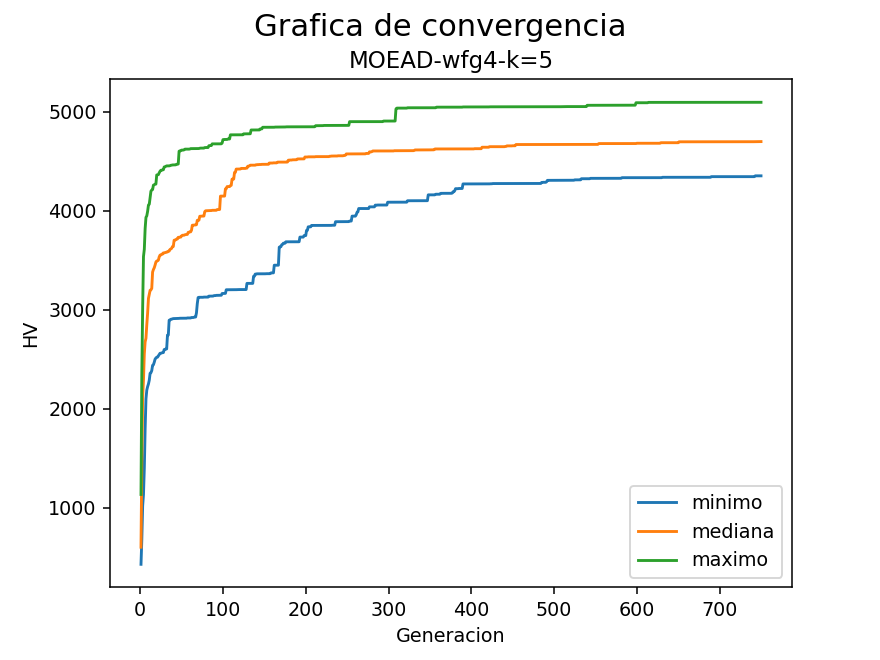

<IPython.core.display.Javascript object>


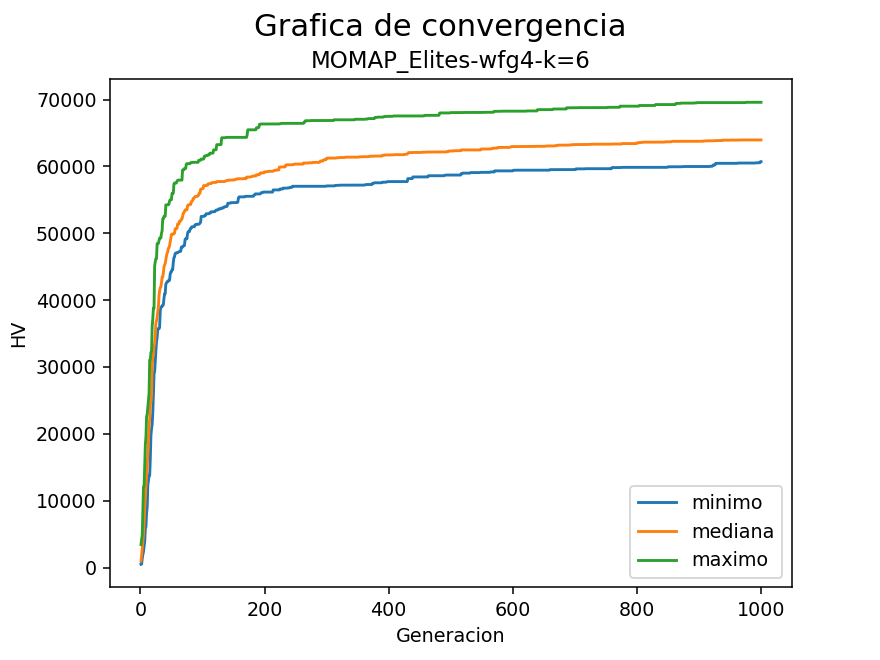

<IPython.core.display.Javascript object>


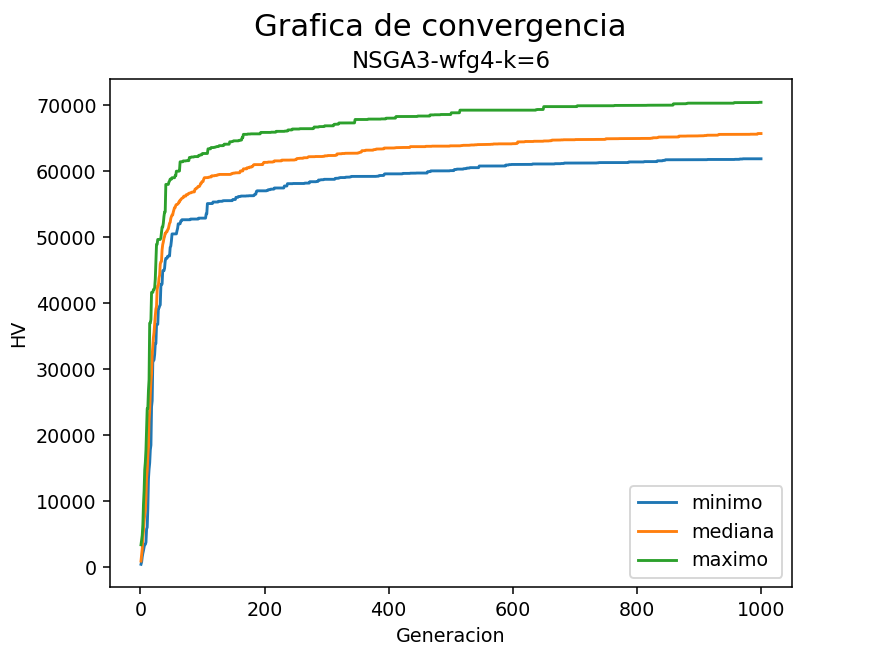

<IPython.core.display.Javascript object>


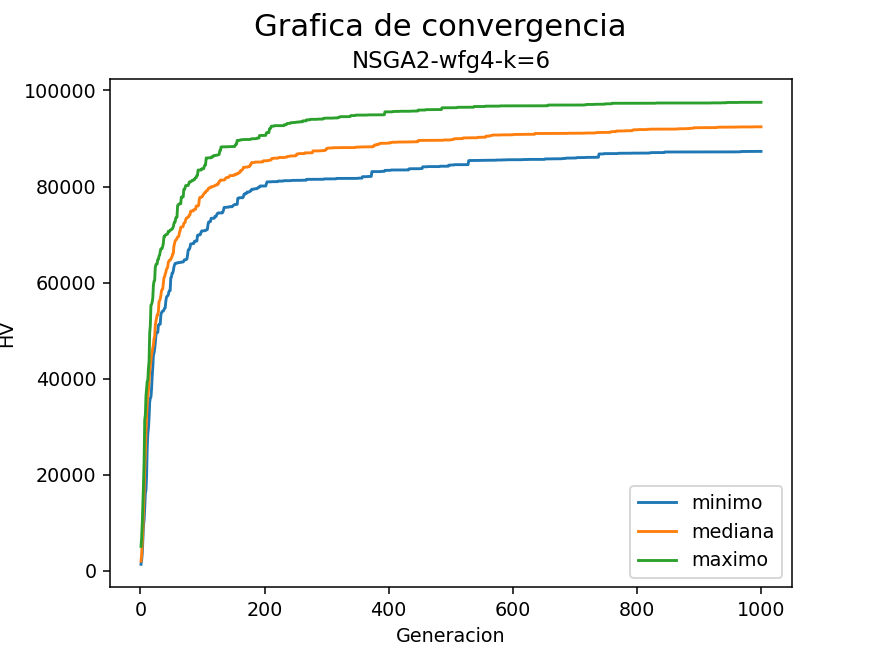

<IPython.core.display.Javascript object>


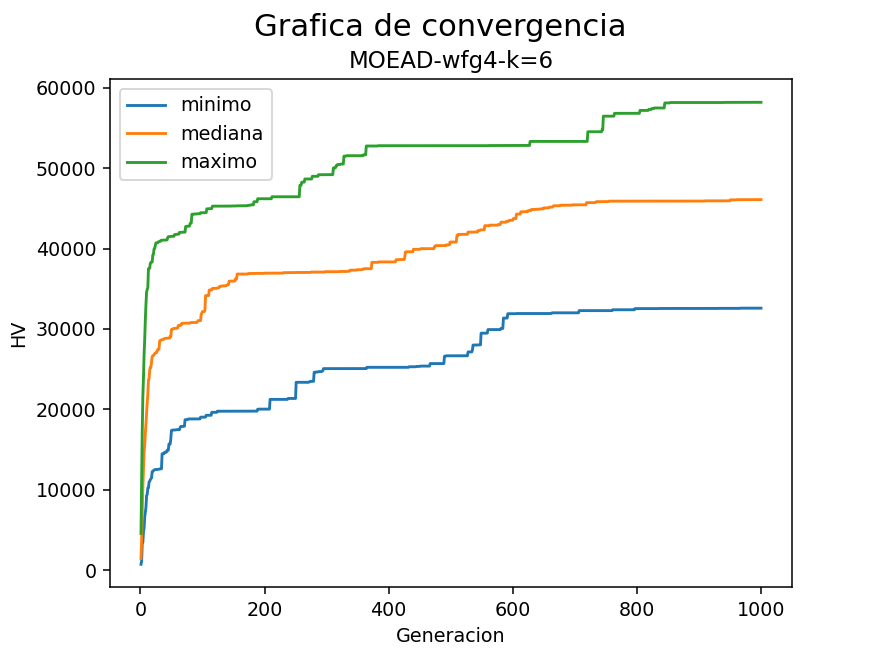

<ipython-input-322-4627f63b35f8>:83: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


<IPython.core.display.Javascript object>


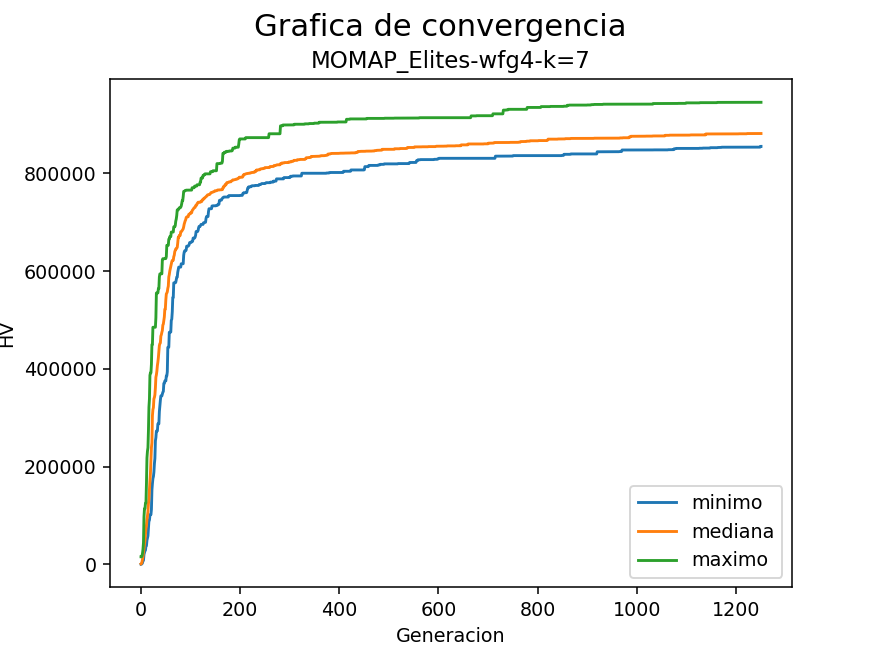

<IPython.core.display.Javascript object>


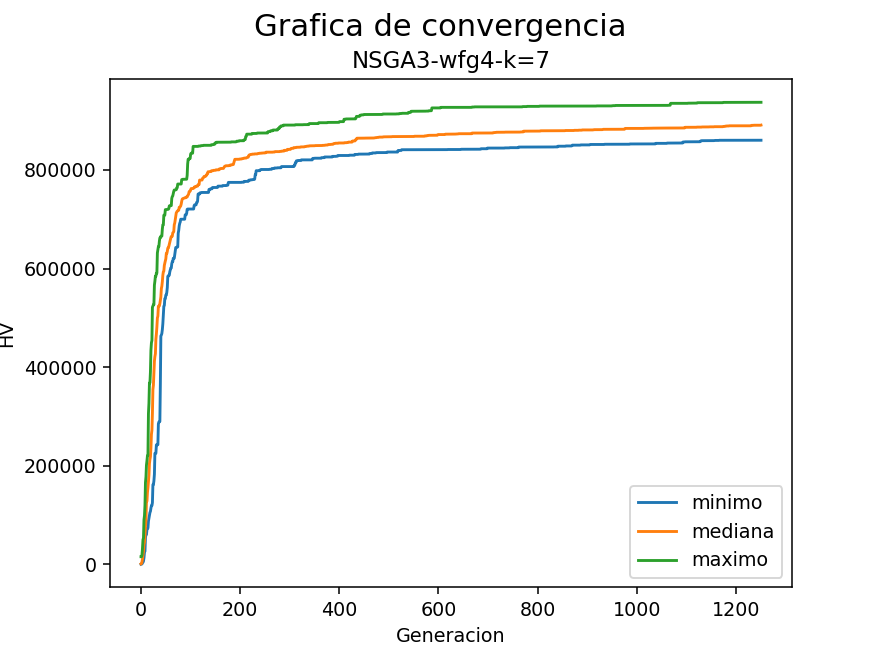

<IPython.core.display.Javascript object>


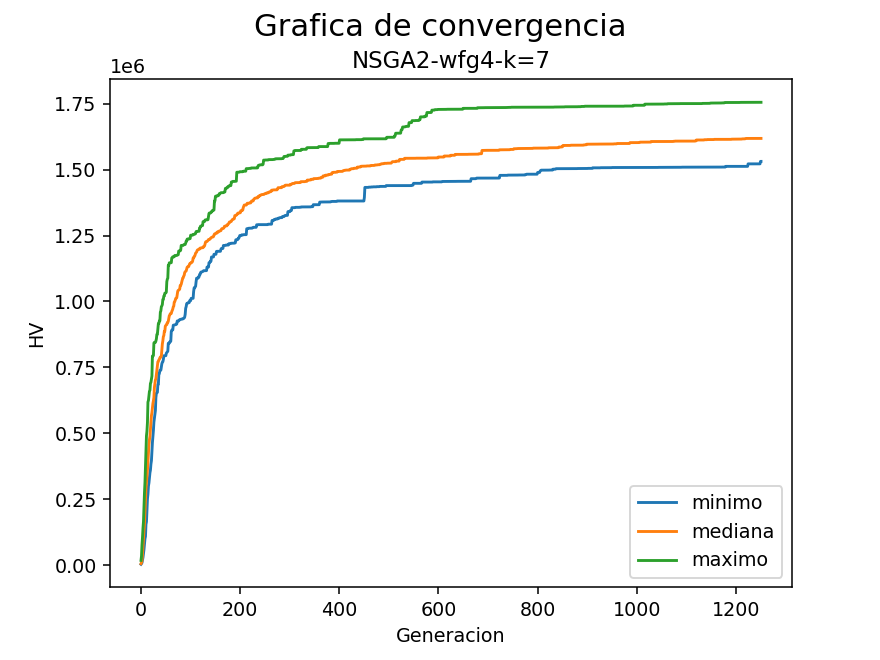

<IPython.core.display.Javascript object>


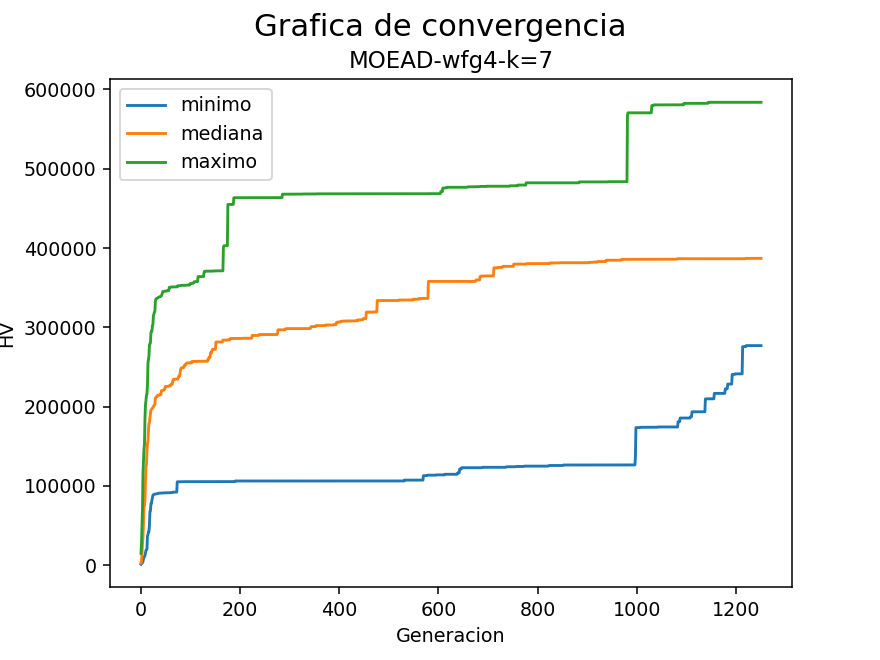

<IPython.core.display.Javascript object>


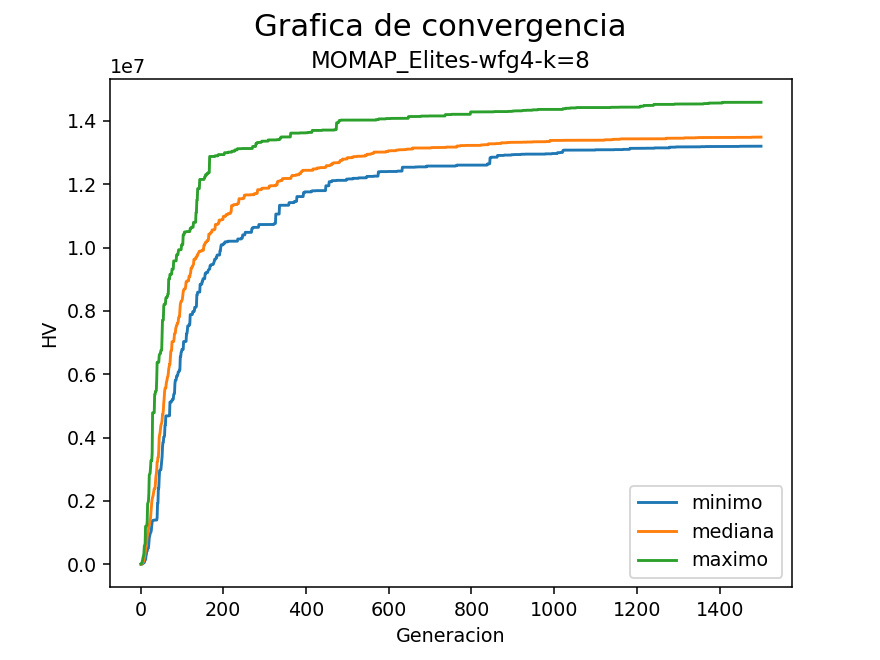

<IPython.core.display.Javascript object>


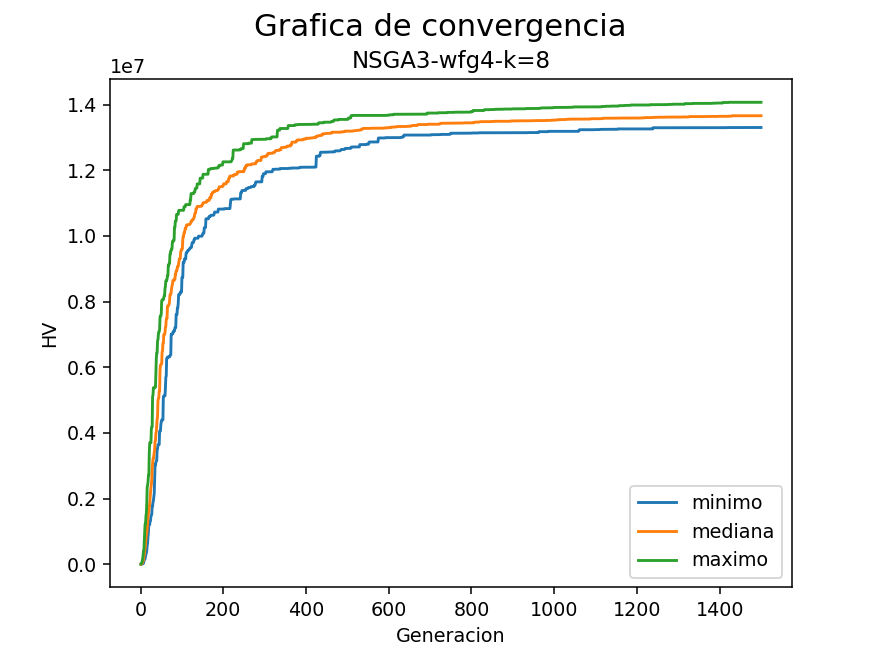

<IPython.core.display.Javascript object>


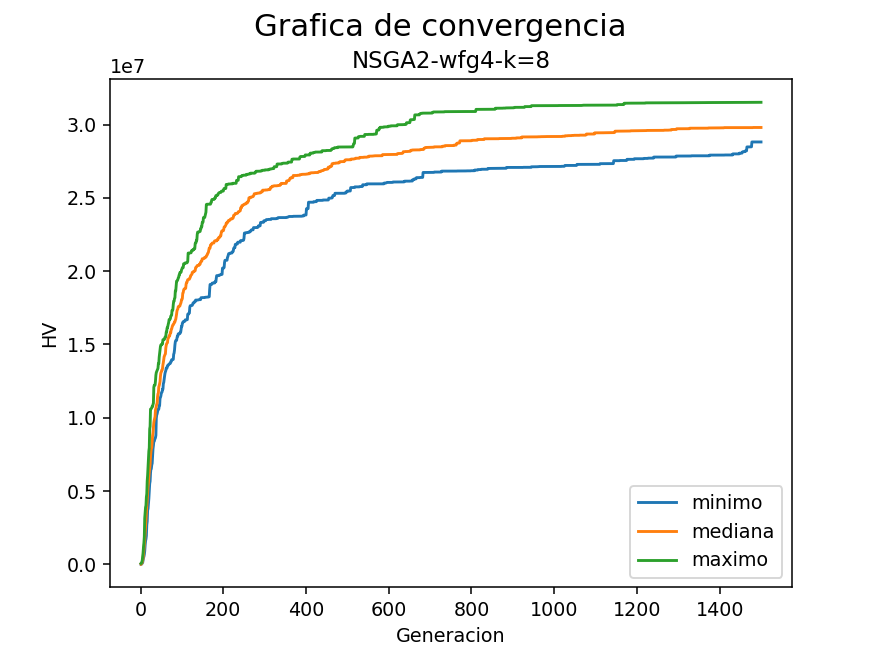

<IPython.core.display.Javascript object>


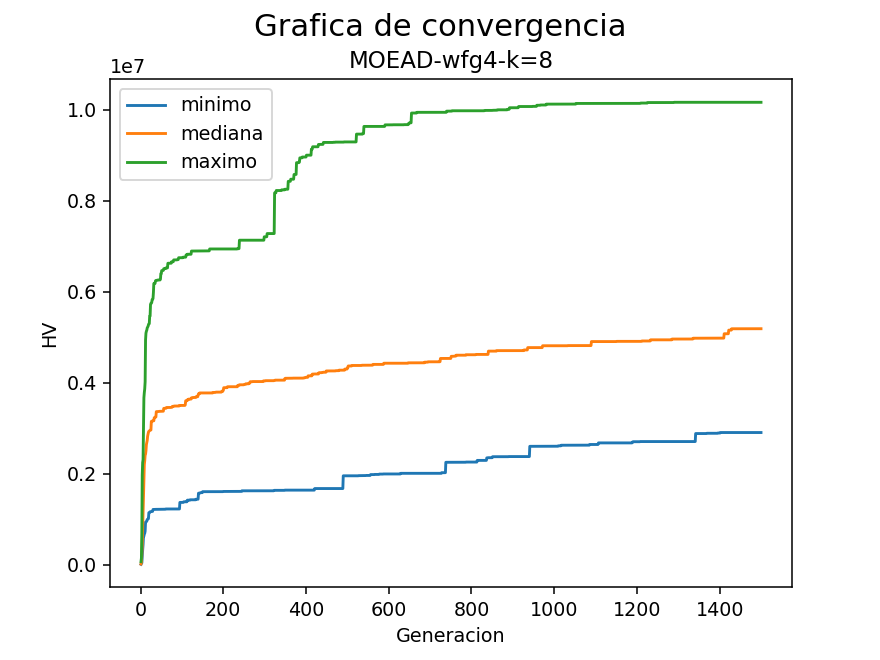

<IPython.core.display.Javascript object>


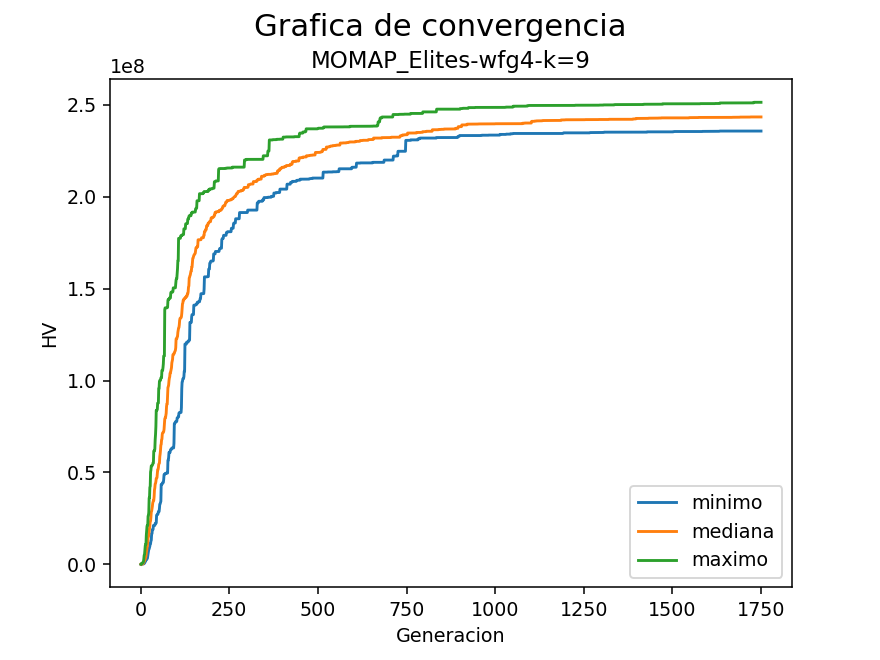

<IPython.core.display.Javascript object>


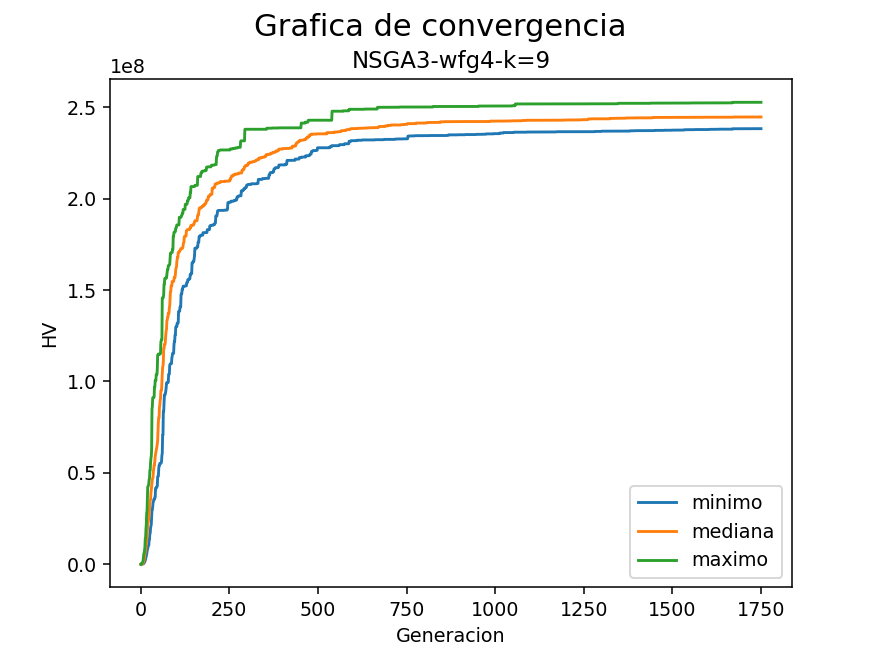

<IPython.core.display.Javascript object>


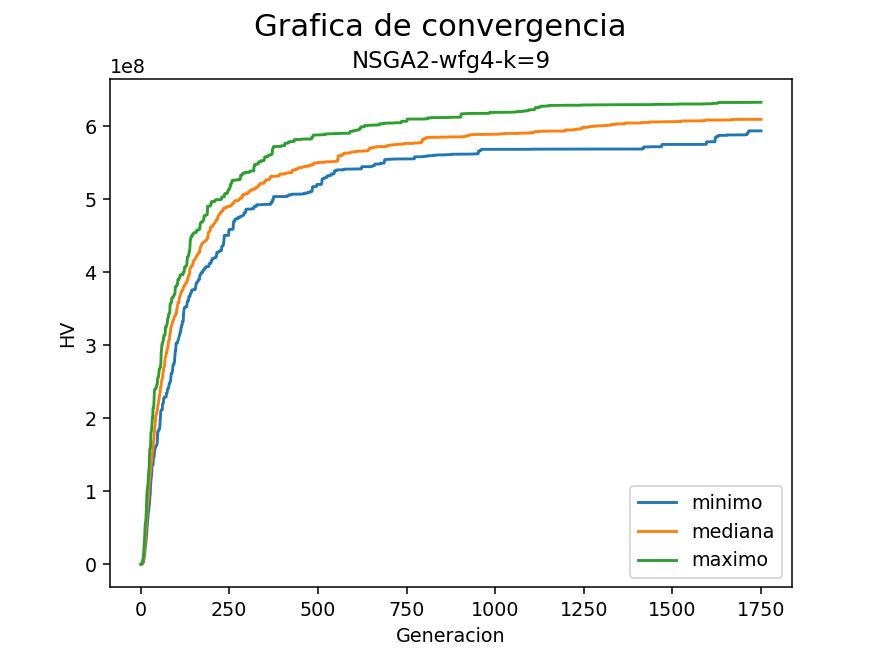

<IPython.core.display.Javascript object>


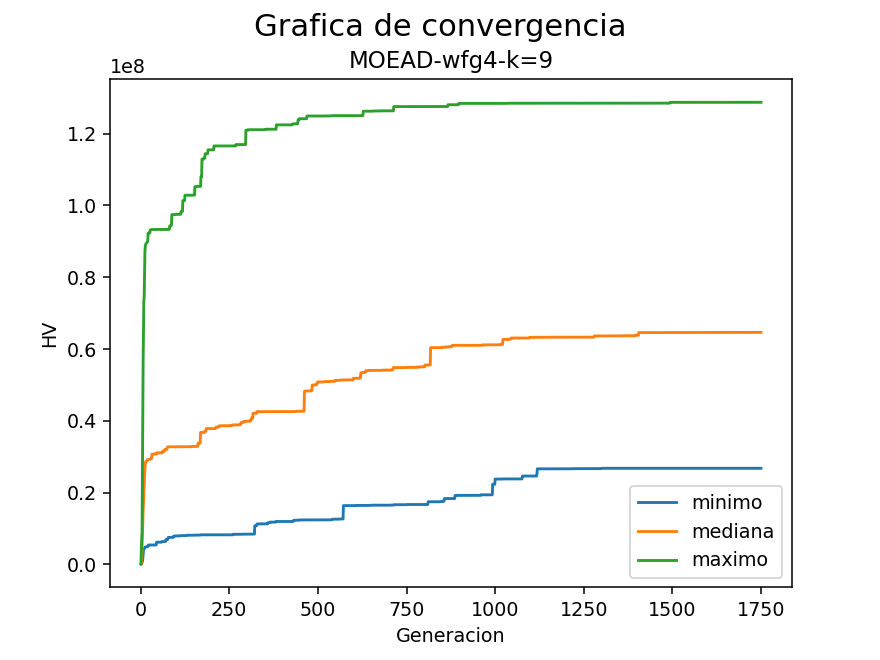

<IPython.core.display.Javascript object>


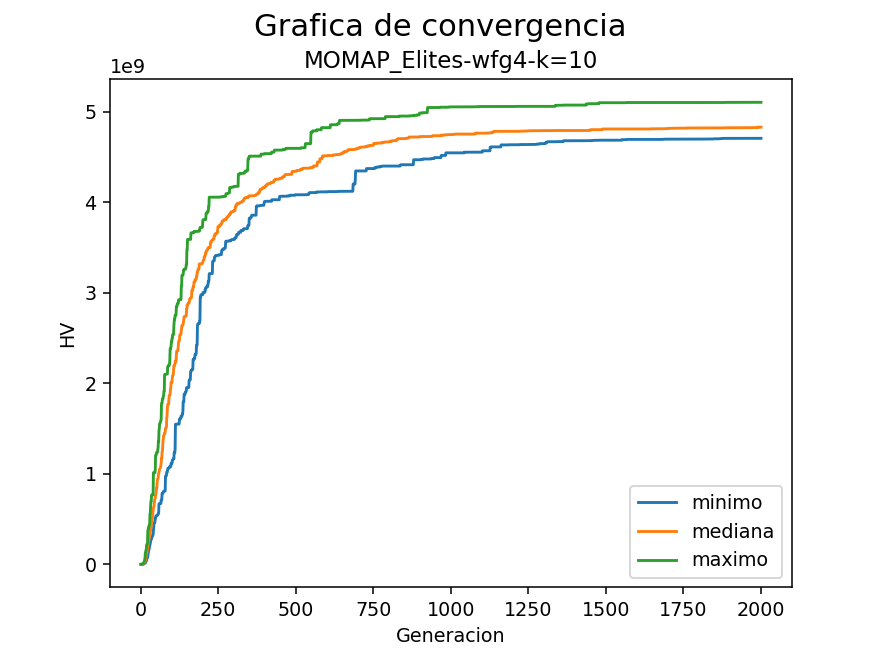

<IPython.core.display.Javascript object>


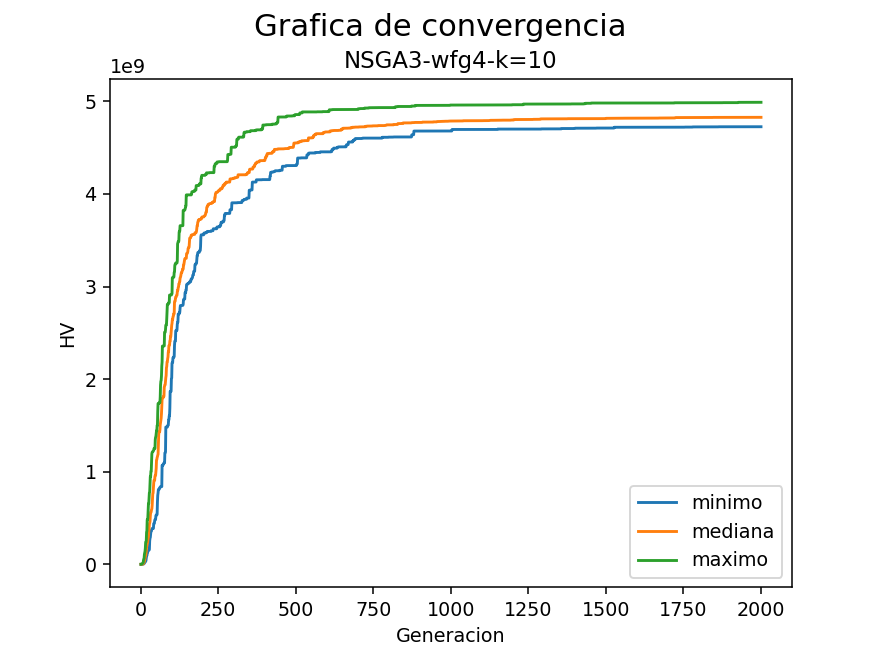

<IPython.core.display.Javascript object>


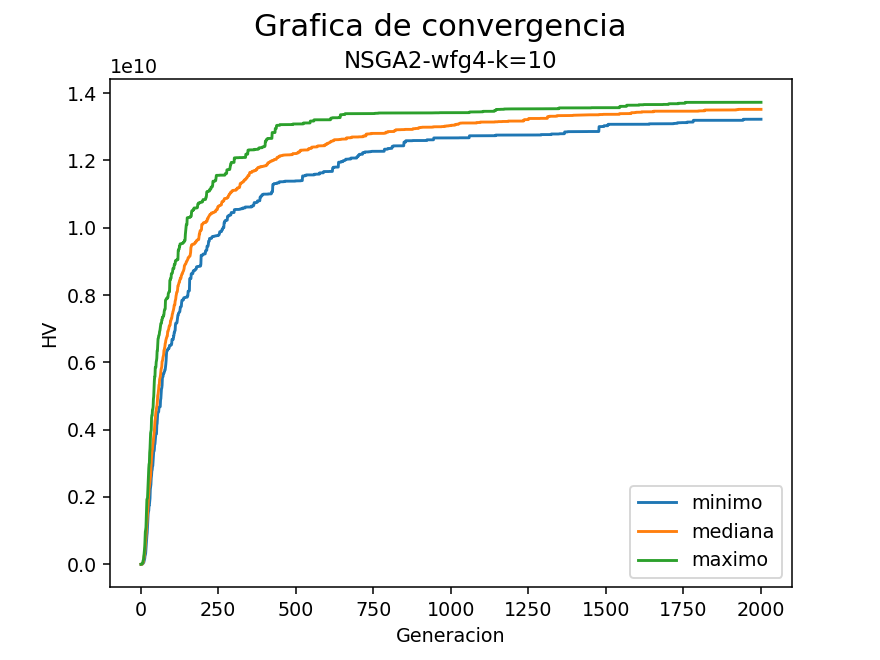

<IPython.core.display.Javascript object>


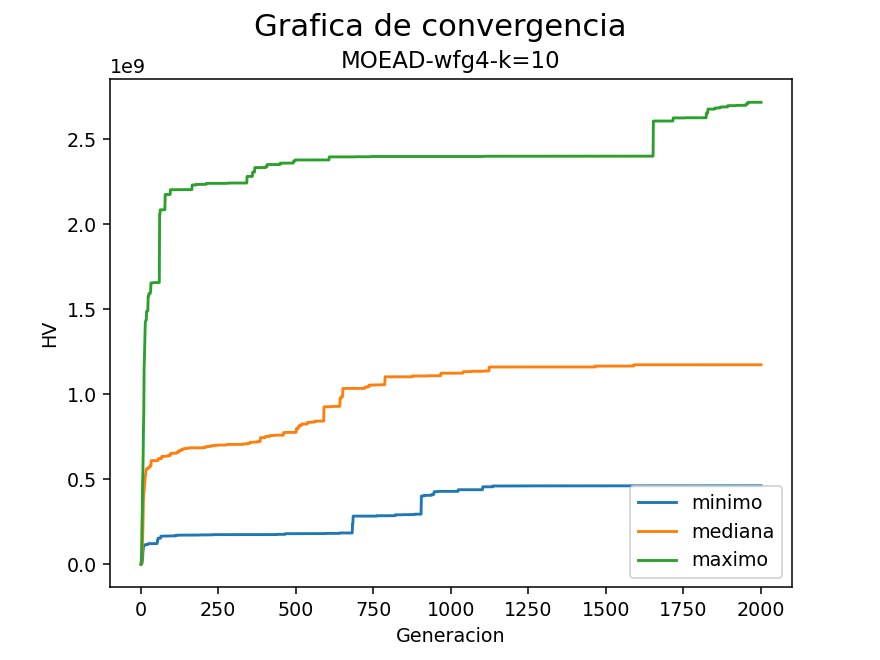

In [326]:
for k in medians.keys():
    multiplot_2d(medians[k], k, "Grafica de convergencia",  "Generacion", "HV", labels = ["minimo", "mediana", "maximo"], save_fig = True)

In [327]:
medians_pareto = {}
for k in merged_data_pareto.keys():
    if "k=3" in k:
        for i in range(len(merged_data_pareto[k])):
            merged_data_pareto[k][i] = np.array(merged_data_pareto[k][i])
        medians_pareto[k] = extract_median_front(np.array(merged_data_pareto[k]), merged_data[k][:,-1])

<ipython-input-327-d03d233040d7>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  medians_pareto[k] = extract_median_front(np.array(merged_data_pareto[k]), merged_data[k][:,-1])


<IPython.core.display.Javascript object>


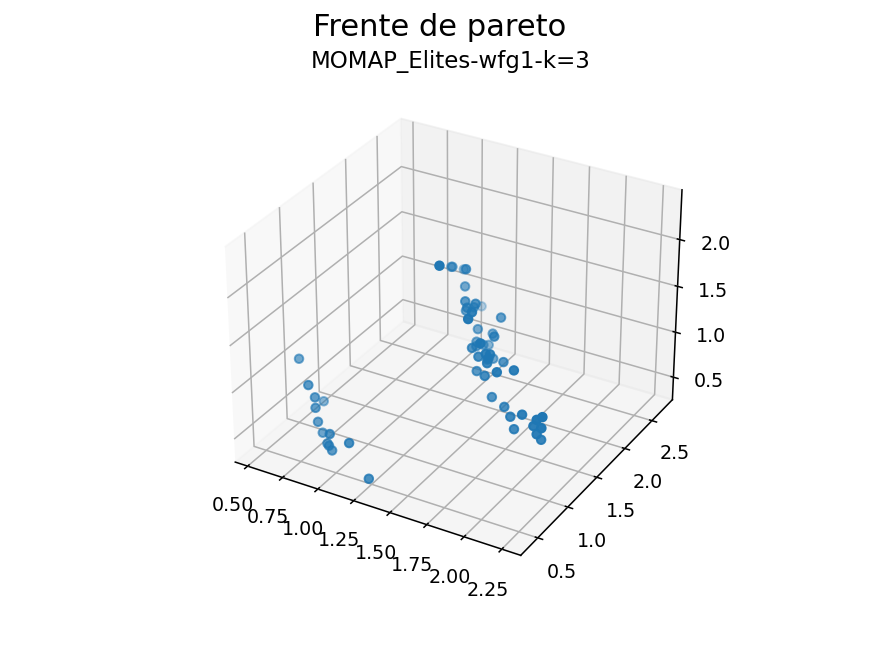

<IPython.core.display.Javascript object>


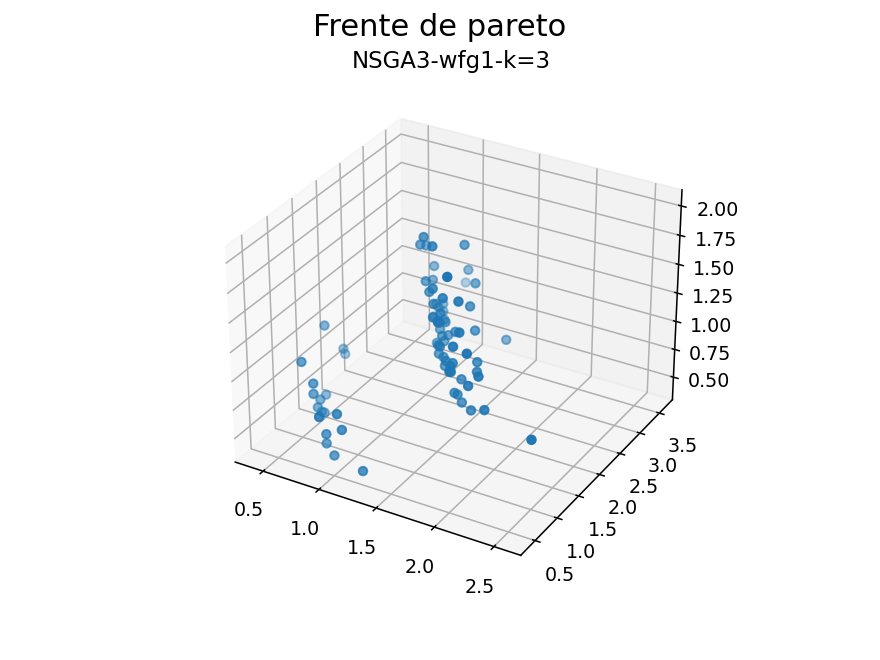

<IPython.core.display.Javascript object>


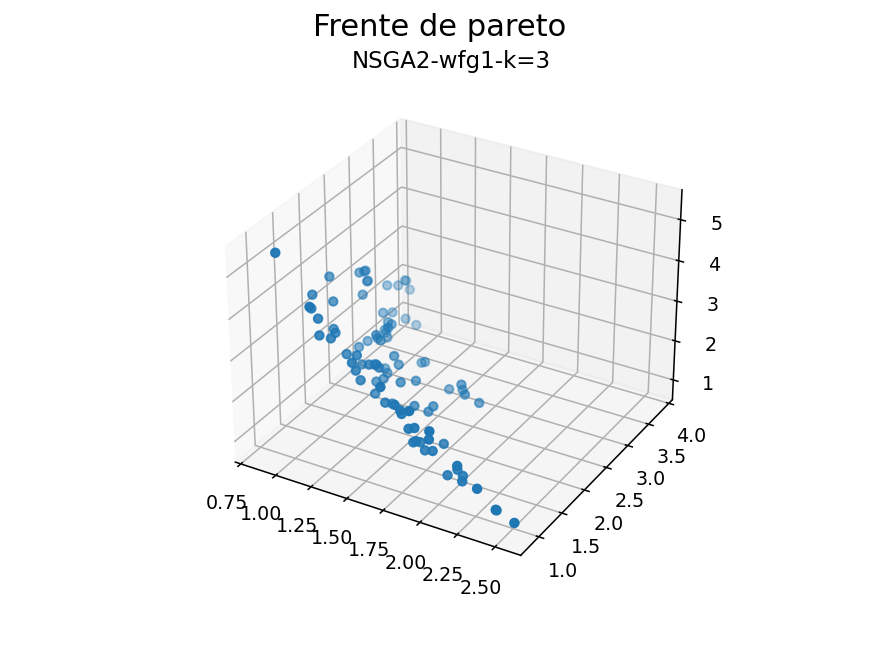

<IPython.core.display.Javascript object>


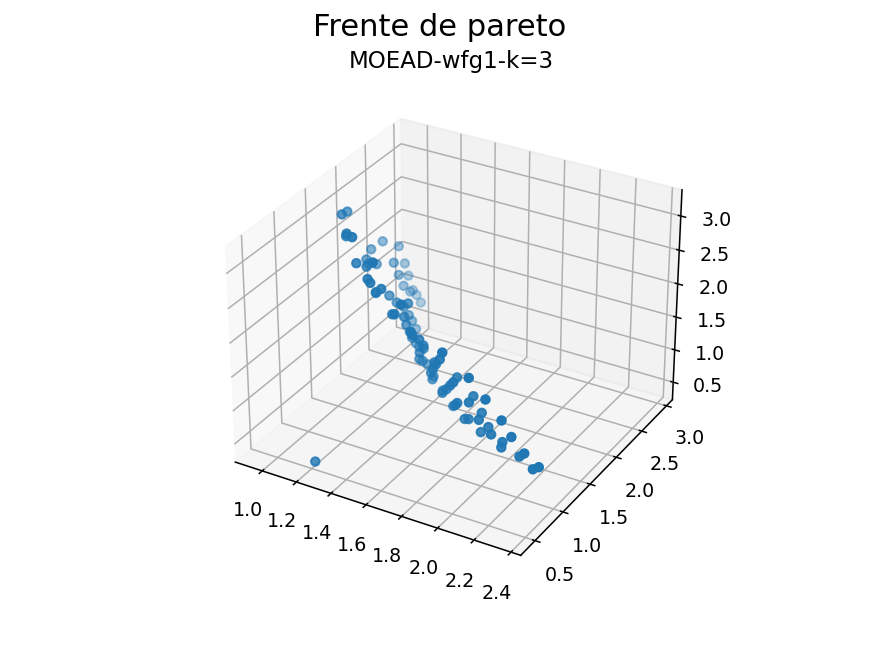

<IPython.core.display.Javascript object>


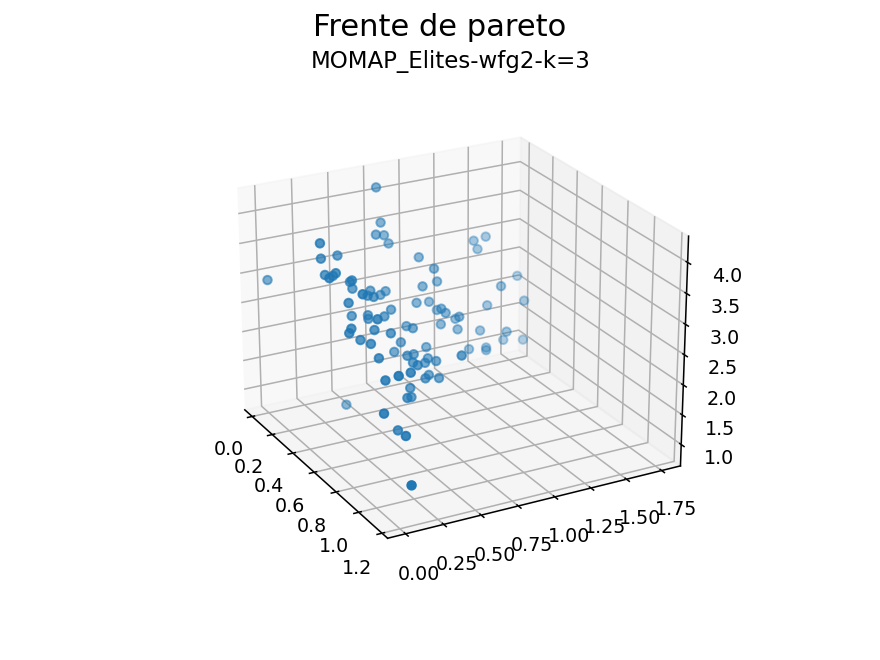

<IPython.core.display.Javascript object>


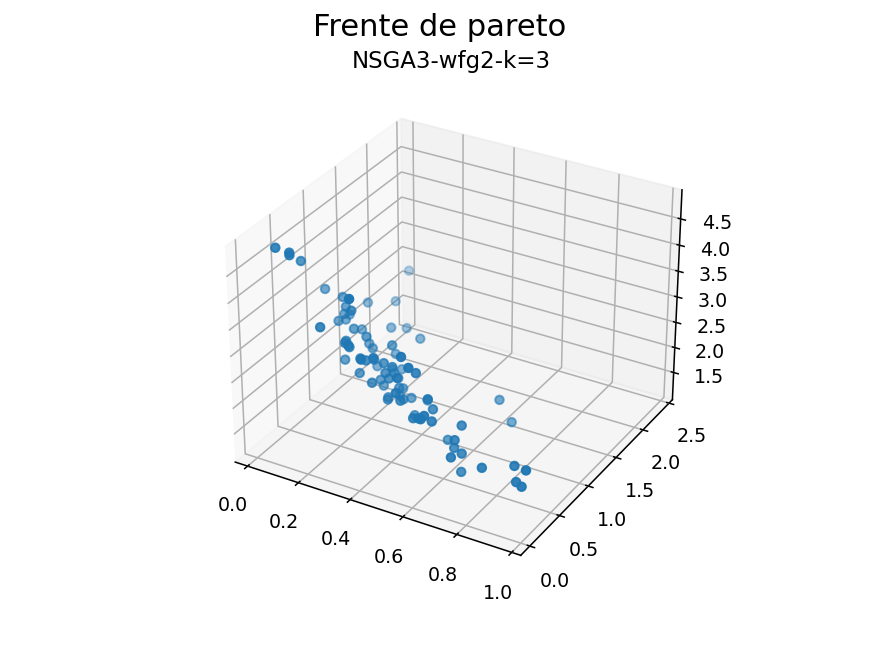

<IPython.core.display.Javascript object>


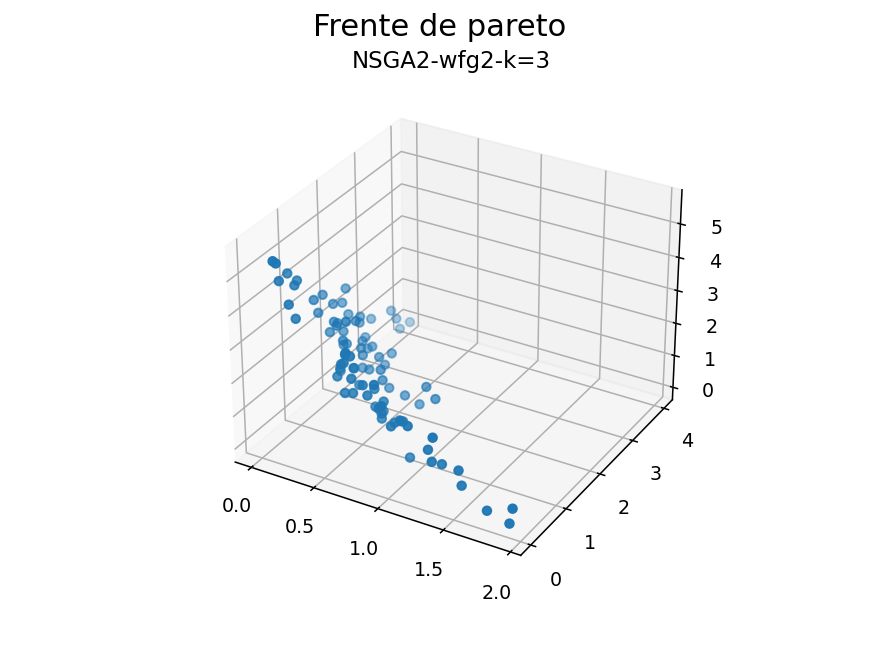

<IPython.core.display.Javascript object>


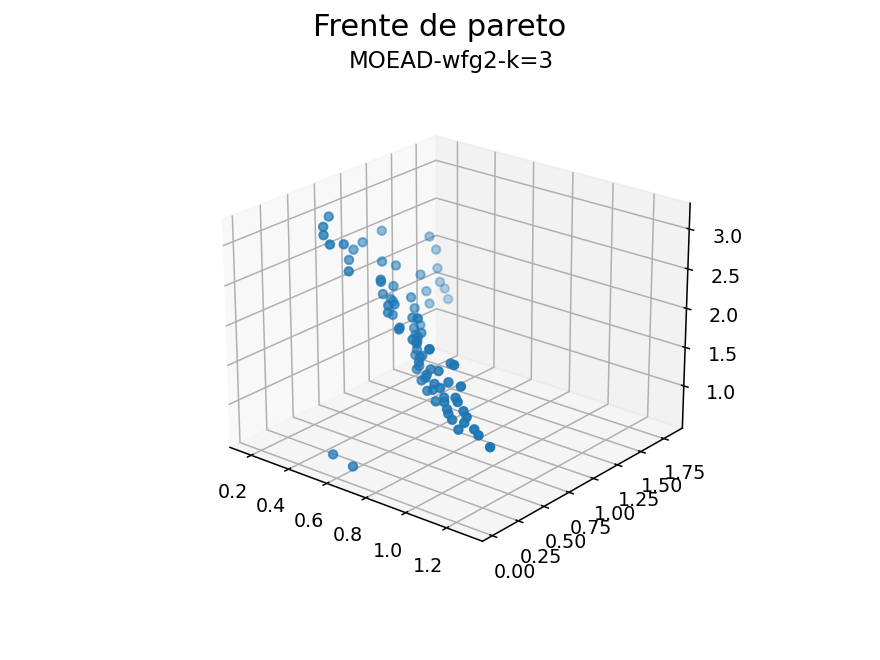

<IPython.core.display.Javascript object>


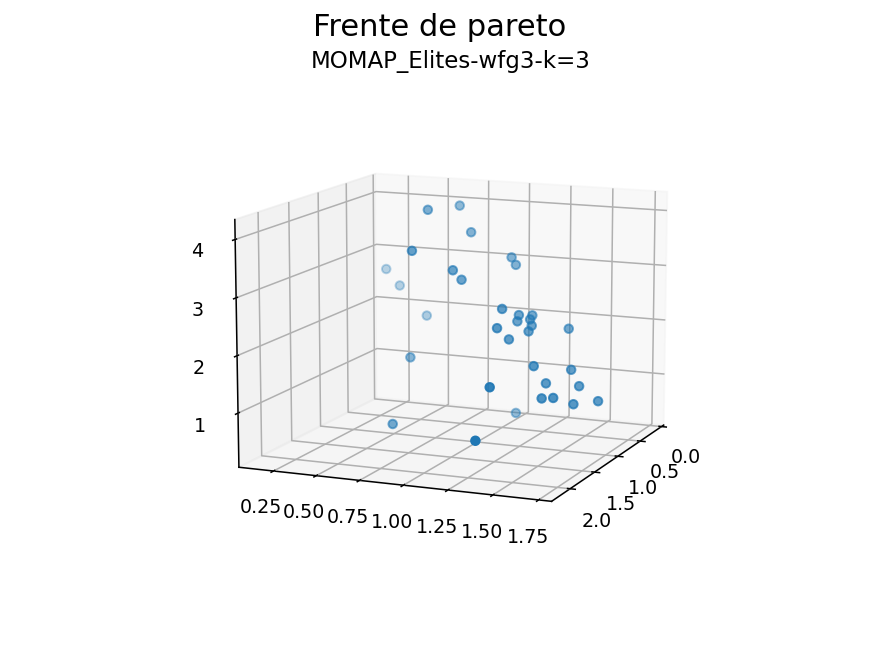

<IPython.core.display.Javascript object>


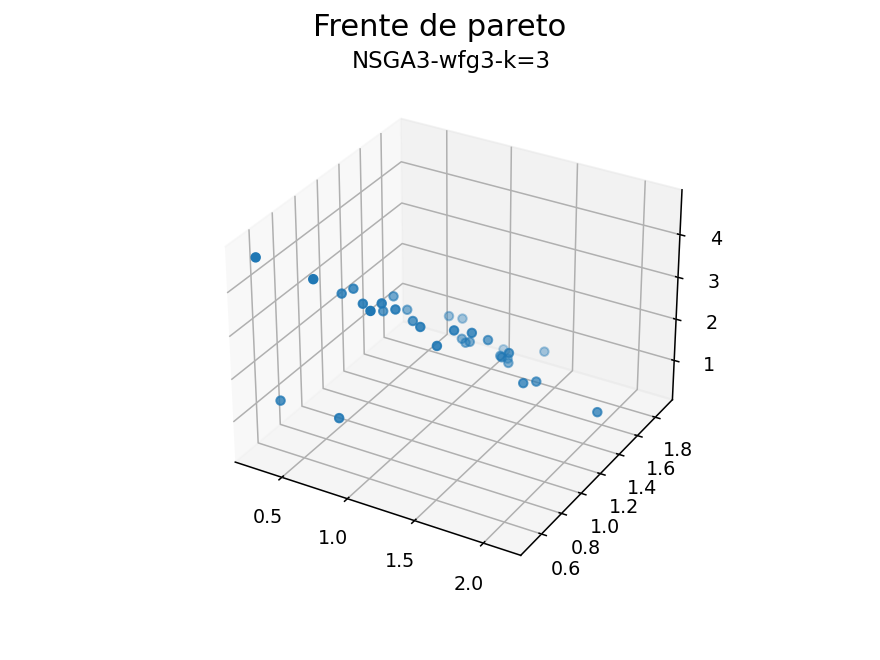

<IPython.core.display.Javascript object>


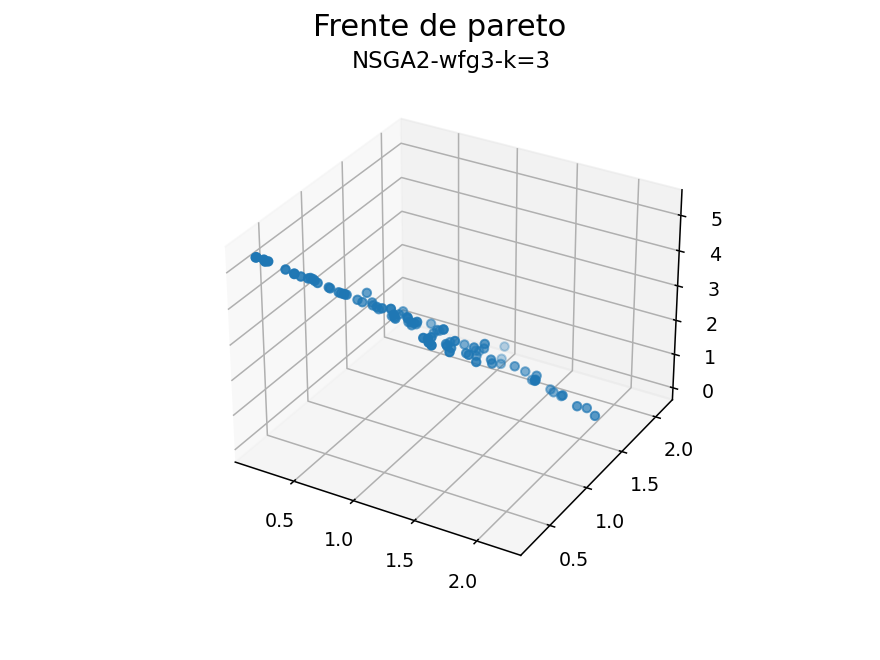

<IPython.core.display.Javascript object>


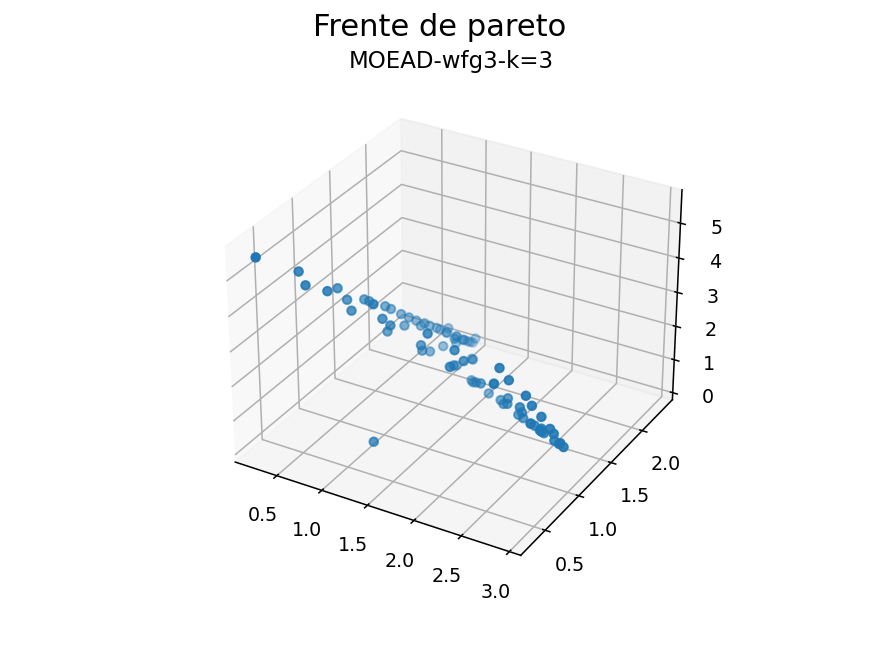

In [328]:
for k, v in medians_pareto.items():
    plot_mat_3d([v], k, f"Frente de pareto", save_fig = True)


In [329]:
scaling = {}
averages = {}
for k in merged_data.keys():
    if "wfg4" in k:
        avg = np.average(merged_data[k], axis = 0)[-1]
        averages[k] = avg

In [330]:
algos = ["NSGA3", "NSGA2", "MOEAD", "MOMAP_Elites"]
algo_scaling = dict(zip(algos, [[] for _ in range(len(algos))]))
for algo in algos:
    for i in range(5, 11):
        algo_scaling[algo] += [averages[f"{algo}-wfg4-k={i}"]]

<IPython.core.display.Javascript object>


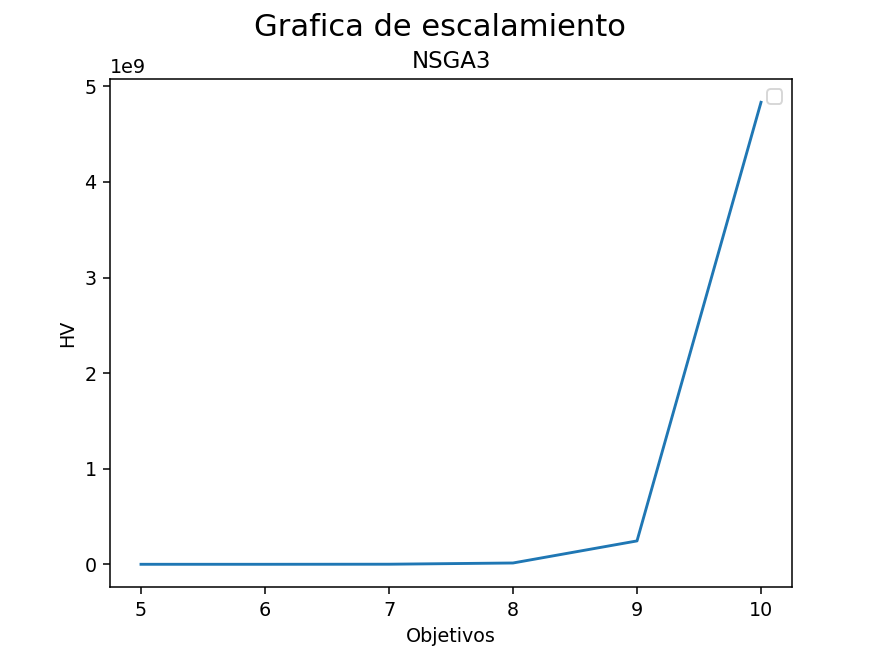

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


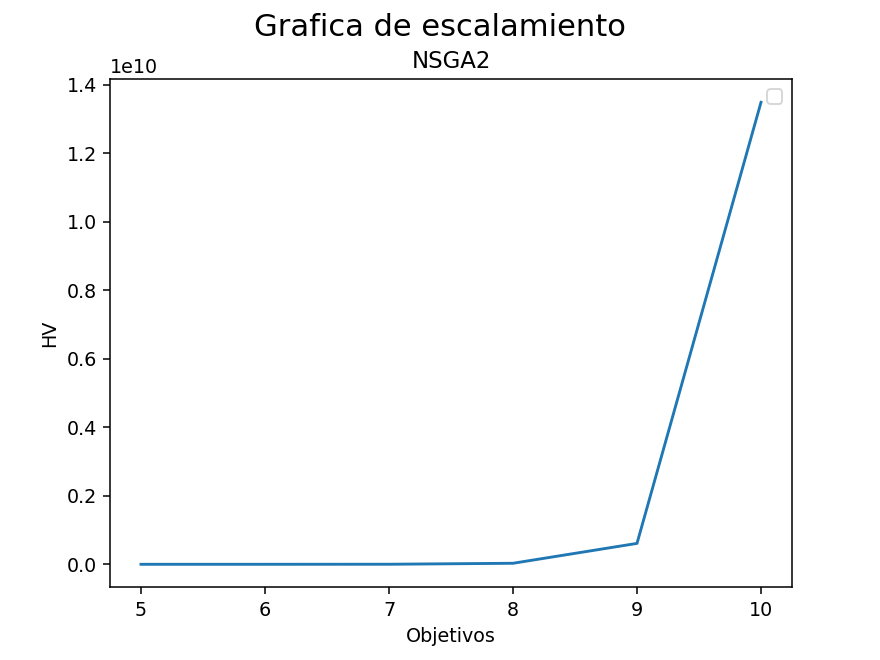

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


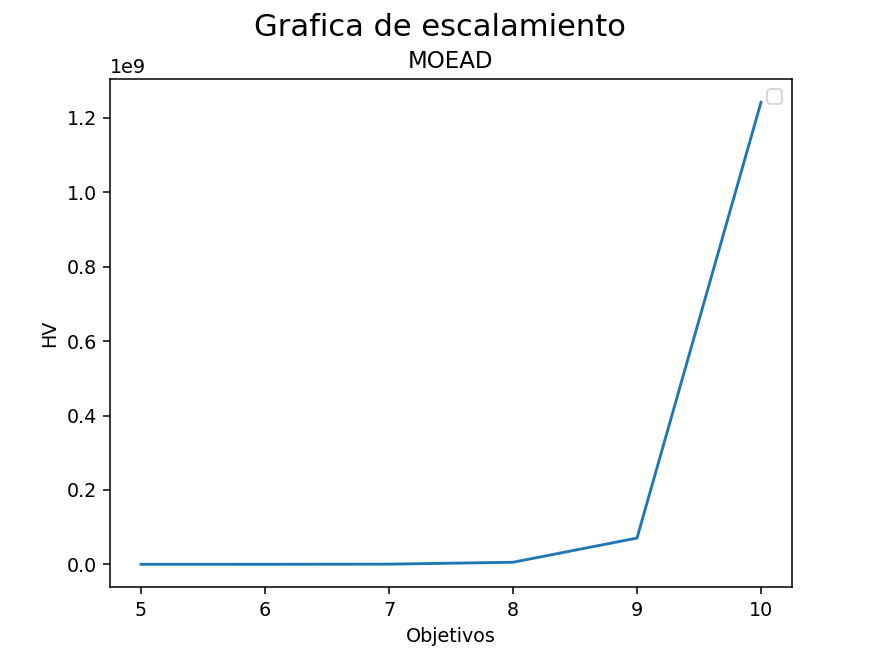

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


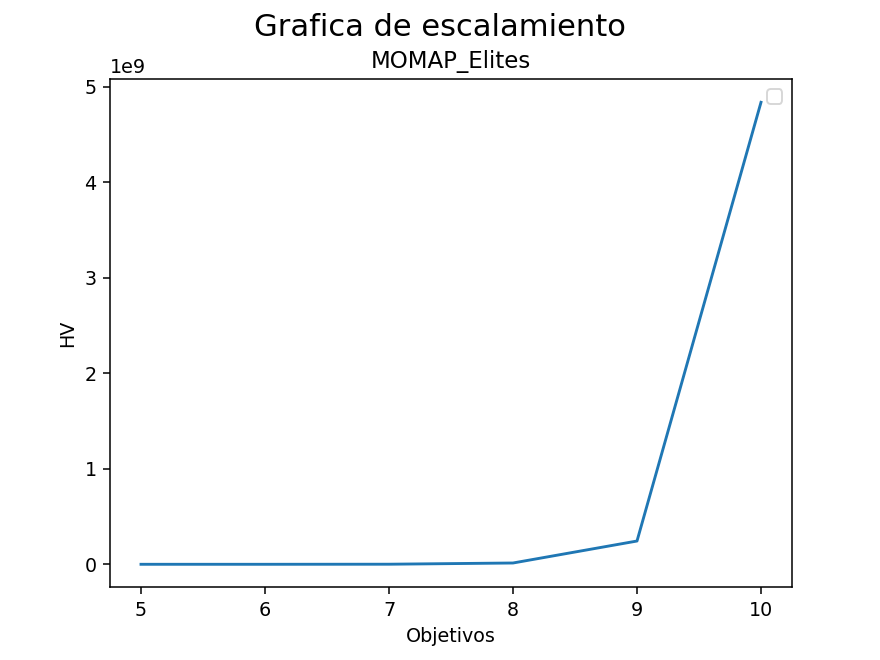

No handles with labels found to put in legend.


In [331]:
x = np.arange(5, 11)
x = x.reshape(6, 1)
for k in algo_scaling.keys():
    pl = np.concatenate((x, np.array(algo_scaling[k]).reshape(6, 1)), axis = 1)
    multiplot_2d([pl], k, "Grafica de escalamiento", "Objetivos", "HV", save_fig = True)

In [332]:
algos = ["NSGA3", "NSGA2", "MOEAD", "MOMAP_Elites"]
problems = ["wfg1-k=3", "wfg2-k=3", "wfg3-k=3", "wfg4-k=5", "wfg4-k=6", "wfg4-k=7", "wfg4-k=8", "wfg4-k=9", "wfg4-k=10"]
problems_stats = dict(zip(problems, [[] for _ in range(len(problems))]))
algos_stats = dict(zip(algos, [problems_stats.copy() for _ in range(len(algos))]))
algos_stats_table = dict(zip(algos, [problems_stats.copy() for _ in range(len(algos))]))
for k in merged_data.keys():
    avg_table = np.average(merged_data[k][:,-1])
    std_table = np.std(merged_data[k][:,-1])
    avg = np.average(merged_data[k], axis = 1)
    std_dev = np.std(merged_data[k], axis = 1)
    key = k
    splitted_k = key.split("-")
    algo = splitted_k[0]
    problem = splitted_k[1] + "-" + splitted_k[2]
    algos_stats_table[algo][problem] = [avg_table, std_table]
    algos_stats[algo][problem] = [list(avg), list(std_dev)]

In [333]:
problems_stats = dict(zip(problems, [[] for _ in range(len(problems))]))
transformed_data = dict(zip(algos, [problems_stats.copy() for _ in range(len(algos))]))
for k in merged_data.keys():
    key = k
    splitted_k = key.split("-")
    algo = splitted_k[0]
    problem = splitted_k[1] + "-" + splitted_k[2]
    transformed_data[algo][problem] = merged_data[k]

In [348]:
transformed_data

{'NSGA3': {'wfg1-k=3': array([[2.21355335e-02, 2.21775436e-02, 2.23045380e-02, ...,
          9.77497959e+00, 9.78011314e+00, 9.78011314e+00],
         [1.89171354e-02, 1.94769294e-02, 2.33300341e-02, ...,
          9.84979815e+00, 9.84979815e+00, 9.85412400e+00],
         [1.94702431e-02, 1.94756394e-02, 2.36764793e-02, ...,
          9.68090878e+00, 9.70462696e+00, 9.70462696e+00],
         ...,
         [1.58338297e-02, 2.37422612e-02, 2.68218020e-02, ...,
          7.99568477e+00, 8.03669944e+00, 8.03669944e+00],
         [2.03925249e-02, 2.24107569e-02, 3.33575280e-02, ...,
          1.53331068e+01, 1.53331068e+01, 1.53331068e+01],
         [3.87888197e-02, 4.23887534e-02, 1.22633545e-01, ...,
          2.32290048e+01, 2.32290048e+01, 2.32290048e+01]]),
  'wfg2-k=3': array([[ 7.33505553, 11.88547714, 11.88547714, ..., 52.38502176,
          52.38502176, 52.38502176],
         [ 4.57660444, 11.4887099 , 11.4887099 , ..., 28.55798812,
          28.55798812, 28.55798812],
         [ 

In [334]:
from scipy.stats import ranksums
import random
p_tests = {}
keys = list(transformed_data.keys())
for i in range(len(keys)):
    k1 = keys[i]
    for j in range(i + 1, len(keys)):
        k2 = keys[j]
        algo_pair = k1 + "-" + k2
        p_tests[algo_pair] = {}
        for prob in problems:
            min_cols = min(transformed_data[k1][prob].shape[1], transformed_data[k2][prob].shape[1])
            runs = transformed_data[k1][prob].shape[0]
            p_tests[algo_pair][prob] = []
            for run in range(runs):
                p_tests[algo_pair][prob] += [ranksums(transformed_data[k1][prob][run,:min_cols], transformed_data[k2][prob][run, :min_cols]).pvalue]
        


In [335]:
problem_algo_mapping = {}
for algo in transformed_data.keys():
    for problem in algos_stats[algo].keys():
        if problem not in problem_algo_mapping:
            problem_algo_mapping[problem] = {}
            problem_algo_mapping[problem][algo] = transformed_data[algo][problem][:,-1]
        else:
            problem_algo_mapping[problem][algo] = transformed_data[algo][problem][:,-1]

<IPython.core.display.Javascript object>


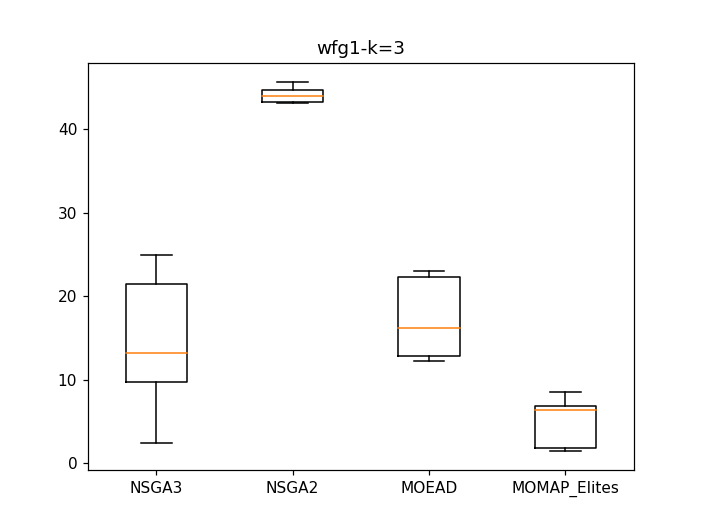

<IPython.core.display.Javascript object>


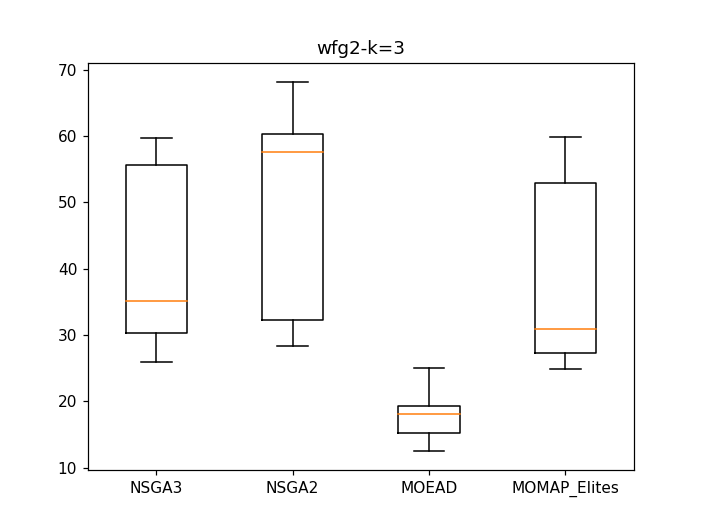

<IPython.core.display.Javascript object>


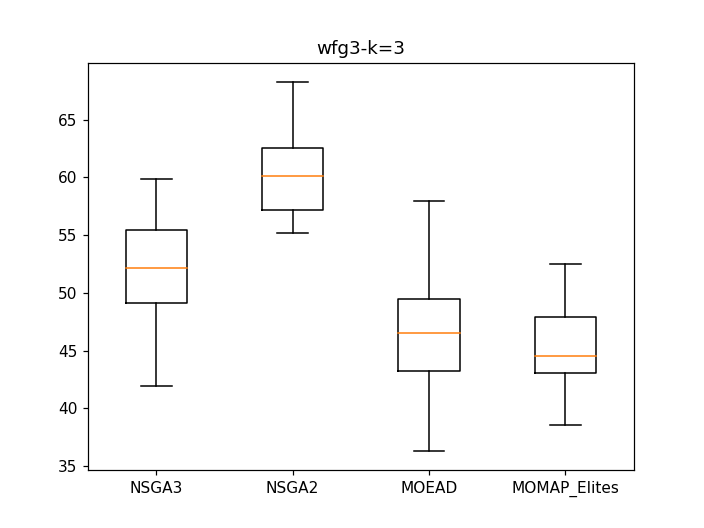

<IPython.core.display.Javascript object>


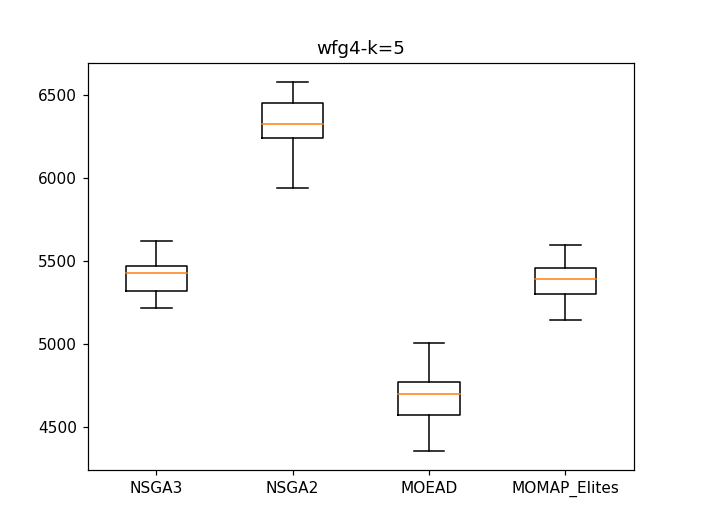

<IPython.core.display.Javascript object>


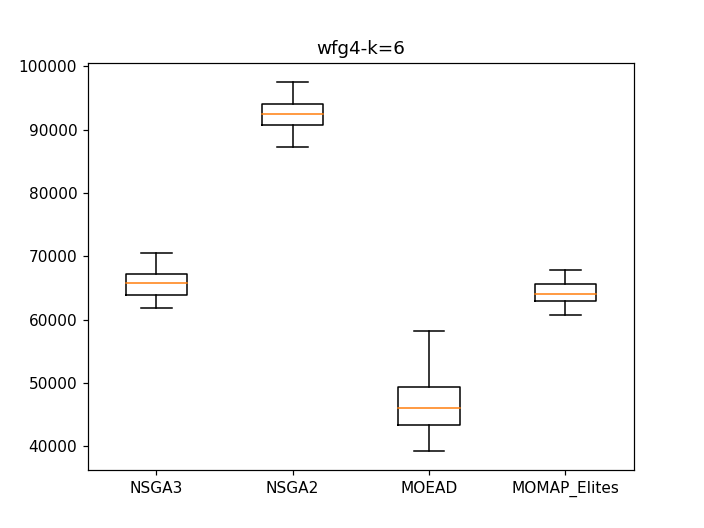

<IPython.core.display.Javascript object>


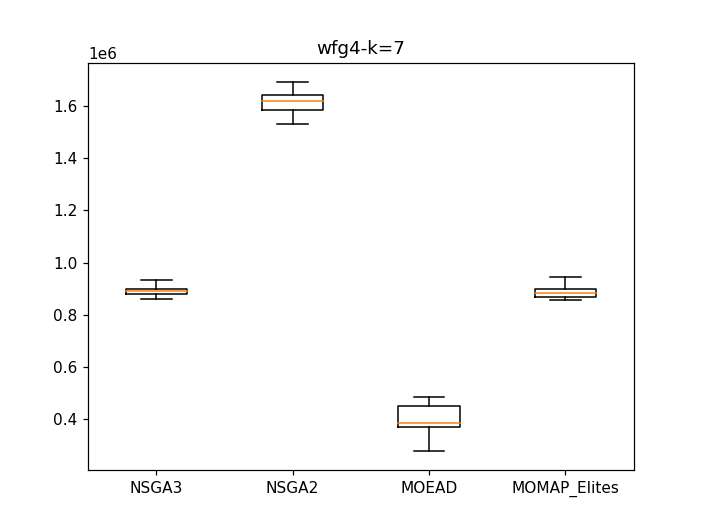

<IPython.core.display.Javascript object>


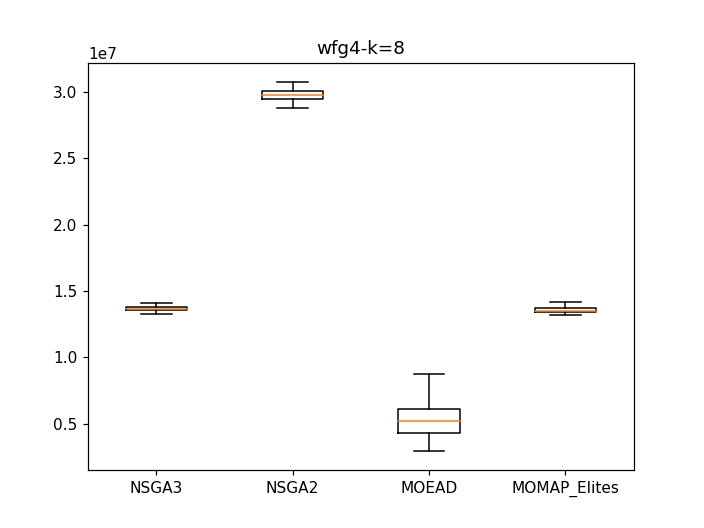

<IPython.core.display.Javascript object>


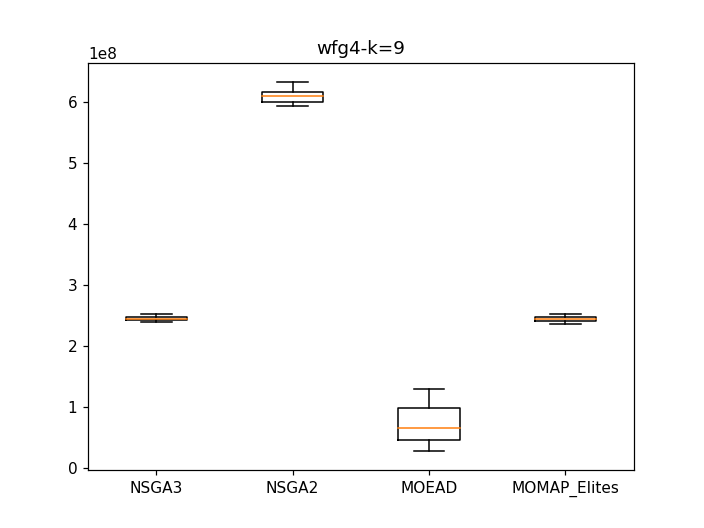

<IPython.core.display.Javascript object>


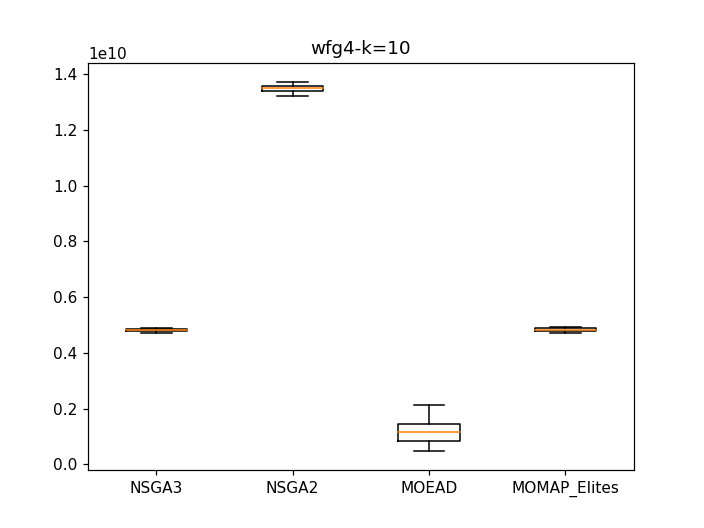

In [290]:
for problem in problem_algo_mapping.keys():
    data = list(problem_algo_mapping[problem].values())
    labels = list(problem_algo_mapping[problem].keys())
    fig, ax = plt.subplots()
    ax.set_title(problem)
    ax.boxplot(data, labels = labels, showfliers=False)
    plt.savefig(f"{problem}-box-plot.png")
    plt.show()

In [336]:
problem_algo_mapping

{'wfg1-k=3': {'NSGA3': array([ 9.78011314,  9.854124  ,  9.70462696, 16.64197976, 10.45355181,
         20.83578052, 14.62832462, 24.51318763, 24.64133349, 12.83821421,
         10.43807608,  2.44778798,  6.95301531,  3.37143393, 24.91296229,
         42.15352798, 13.6594675 ,  8.03669944, 15.33310682, 23.22900475]),
  'NSGA2': array([44.05354899, 44.70703322, 26.55293966, 44.4708156 , 43.86999127,
         43.99922114, 41.08070501, 26.6903749 , 43.62056711, 45.09286499,
         44.12230185, 44.70932345, 43.11445404, 43.29207907, 44.65587308,
         45.19059659, 45.66166084, 44.48234799, 23.86581646, 43.82604053]),
  'MOEAD': array([13.48066603, 15.47741895, 17.63574698, 21.11607739, 12.67075917,
         13.17472841, 12.82248652, 12.28711992, 22.75479728, 12.70155318,
         12.65664244, 22.98686974, 17.0026217 , 22.3723194 , 21.33793189,
         22.65346663, 15.50253696, 22.58069522, 12.77625802, 22.22990652]),
  'MOMAP_Elites': array([ 5.45815061,  6.55365302,  1.52306194,  1.

In [347]:
problem_algo_mapping_stats = []
for problem in problem_algo_mapping.keys():
    row = [problem]
    for algo in problem_algo_mapping[problem]:
        mean_std = (round(problem_algo_mapping[problem][algo].mean(),3), round(problem_algo_mapping[problem][algo].std(), 3))
        row += [mean_std]
    problem_algo_mapping_stats += [row]
columns = [''] + list(problem_algo_mapping['wfg1-k=3'].keys())

df = pd.DataFrame(problem_algo_mapping_stats, columns = columns)
df = df.round(3)
print(df.to_latex(caption = f"Statistics for the algorithms on each problem"))

\begin{table}
\centering
\caption{Statistics for the algorithms on each problem}
\begin{tabular}{llllll}
\toprule
{} &                           NSGA3 &                             NSGA2 &                            MOEAD &                    MOMAP\_Elites \\
\midrule
0 &   wfg1-k=3 &                 (15.221, 9.106) &                   (41.353, 6.658) &                  (17.311, 4.288) &                  (5.649, 4.657) \\
1 &   wfg2-k=3 &                (42.082, 13.027) &                  (49.847, 14.553) &                  (18.155, 4.314) &                (38.179, 13.095) \\
2 &   wfg3-k=3 &                 (52.028, 4.817) &                   (60.207, 3.632) &                  (46.295, 5.191) &                 (45.493, 3.901) \\
3 &   wfg4-k=5 &             (5426.303, 133.079) &                (6321.391, 162.86) &              (4702.581, 189.564) &              (5380.491, 130.31) \\
4 &   wfg4-k=6 &           (65651.286, 2458.657) &             (92466.941, 2754.806) &            (4571

In [343]:
df

NSGA3  \
0   wfg1-k=3   (15.221315910149992, 9.106367019374328)   
1   wfg2-k=3   (42.08240788972701, 13.027048135385265)   
2   wfg3-k=3   (52.028076872533674, 4.817271361505717)   
3   wfg4-k=5   (5426.302861161631, 133.07918032501578)   
4   wfg4-k=6   (65651.28626773924, 2458.6570002058015)   
5   wfg4-k=7   (890353.7660206768, 21503.941930563593)   
6   wfg4-k=8  (13674240.761683589, 204803.78323437145)   
7   wfg4-k=9  (244590185.30471697, 3062402.3861077717)   
8  wfg4-k=10    (4833054694.697283, 68238400.28866476)   

                                      NSGA2  \
0     (41.3529277895715, 6.657873781667597)   
1   (49.84676079606728, 14.553377710814237)   
2    (60.20661786667439, 3.631686067268661)   
3    (6321.391064482248, 162.8603999128272)   
4   (92466.94052972904, 2754.8057499929305)   
5  (1617959.7581461666, 53195.465263953054)   
6    (29859616.734483737, 579791.921146941)   
7   (610542532.1956457, 11046031.657645099)   
8  (13494592058.132317, 138493394.59466982)   

                                      MOEAD  \
0   (17.311030118311518, 4.287625558553797)   
1   (18.154566731156088, 4.314015426384295)   
2   (46.294514889667745, 5.190825920812263)   
3   (4702.581287270568, 189.56415405431855)   
4    (45712.72453485505, 5234.341700093351)   
5    (402802.0501825208, 70667.69922572277)   
6  (5493010.5466612745, 1869938.7782634618)   
7   (70544846.77712628, 30789304.823354635)   
8   (1242028592.7322087, 529727219.4441921)   

                               MOMAP_Elites  
0    (5.649057345595908, 4.657007204805641)  
1   (38.17910056951663, 13.095459156462557)  
2   (45.493170374246404, 3.901483048895666)  
3    (5380.490527338416, 130.3096611308046)  
4   (64232.77544160925, 2248.8147616977467)  
5   (886386.6381285076, 23229.586430467094)  
6  (13608739.429851735, 365616.46265474847)  
7     (243744115.7925361, 4493488.60275634)  
8    (4837920401.571287, 82710560.74230461)

In [291]:
algos_stats

{'NSGA3': {'wfg1-k=3': [[1.7768620877845702,
    4.730843726022741,
    4.242099135093469,
    4.649545295056483,
    3.289026249629643,
    8.132584297423321,
    5.1953189409791785,
    12.42059879937793,
    7.066637313024595,
    8.183288847808425,
    2.898620306143477,
    1.1906921665399806,
    1.8333418762056897,
    1.723134734885161,
    10.239329575695859,
    11.220139487177867,
    6.483434061462771,
    2.0918659045269727,
    5.309684538692709,
    6.119837632026099],
   [1.8036364441923707,
    3.292865239402906,
    3.6698644042648176,
    4.794149449968663,
    3.5961704030985735,
    7.799698150572547,
    5.492458680324797,
    10.498147347790036,
    8.42231403534372,
    4.819546896858419,
    3.118438850364211,
    0.6510080876006195,
    1.6522409817797354,
    0.9656913690734762,
    10.065393169819393,
    12.709148123925827,
    4.996396470353553,
    2.272501421167545,
    4.4166010942302965,
    7.445608494284247]],
  'wfg2-k=3': [[45.22344148465746,
    2

In [292]:
p_tests

{'NSGA3-NSGA2': {'wfg1-k=3': [1.454833049247013e-53,
   1.5776792389194862e-37,
   1.8832966288761378e-25,
   3.30840689837816e-38,
   7.547703750081983e-33,
   5.445971197882758e-13,
   9.354688118829907e-28,
   4.994903493554439e-34,
   3.974562690902648e-27,
   9.625655409332816e-34,
   5.36107501313876e-55,
   1.3262848434905976e-75,
   2.6775928192447653e-31,
   7.918692122163809e-56,
   3.862721324178343e-18,
   4.5176731730534976e-27,
   5.7508463722552574e-46,
   8.932808555649913e-59,
   2.9768656998941597e-10,
   4.171920341582026e-45],
  'wfg2-k=3': [3.590368182251542e-95,
   5.006525702826968e-120,
   1.8428499047949433e-21,
   1.8190044667988444e-88,
   1.9594987557743984e-13,
   1.248926133389538e-102,
   3.1920428276726146e-38,
   3.557875319486857e-111,
   1.762640583385751e-123,
   2.3188944129729054e-118,
   1.0787747397118674e-121,
   2.3864281623918714e-122,
   1.4751944573337745e-18,
   6.408451028963275e-126,
   1.1999142760691065e-119,
   1.3262848434905976e-75,


In [293]:
for algo in algos_stats.keys():
    columns = list(algos_stats[algo].keys())
    values = list(algos_stats[algo].values())
    r = len(values[0][0])
    rows = []
    for column in columns:
        row = []
        for i in range(r):
            row += [f"{round(algos_stats[algo][column][0][i], 2)} ({round(algos_stats[algo][column][1][i],2)})"]
        rows.append(row)
    rows = np.array(rows).T
    df = pd.DataFrame(rows, columns = columns)
    print(df.to_latex(caption = f"Estadisticos para {algo}"))

\begin{table}
\centering
\caption{Estadisticos para NSGA3}
\begin{tabular}{llllllllll}
\toprule
{} &       wfg1-k=3 &      wfg2-k=3 &      wfg3-k=3 &          wfg4-k=5 &            wfg4-k=6 &               wfg4-k=7 &                  wfg4-k=8 &                    wfg4-k=9 &                     wfg4-k=10 \\
\midrule
0  &     1.78 (1.8) &  45.22 (8.05) &   50.27 (5.4) &  5065.67 (432.59) &  63965.61 (8032.22) &  857038.15 (112496.57) &  12680386.28 (2116981.99) &  228410745.09 (39746398.08) &   4500519776.9 (842655235.42) \\
1  &    4.73 (3.29) &  27.08 (2.59) &  39.99 (5.74) &  5274.89 (538.55) &   58713.4 (6870.07) &  830516.86 (124165.69) &  12631938.25 (2213309.88) &  226101262.19 (41785909.62) &  4440918355.43 (885482260.91) \\
2  &    4.24 (3.67) &  26.55 (2.19) &  49.49 (7.78) &  5025.62 (555.35) &  61575.39 (7844.55) &   806473.6 (129074.19) &  12514162.42 (2340147.99) &  228780565.91 (41085714.14) &  4528211837.95 (884228322.01) \\
3  &    4.65 (4.79) &  50.48 (7.59) &   41.31 (

In [294]:
for algo in p_tests.keys():
    columns = list(p_tests[algo].keys())
    values = list(p_tests[algo].values())
    values = np.array(values)
    df = pd.DataFrame(values.T, columns = columns)
    print(df.to_latex(caption = f"Wilkoxon Rank-Sum para {algo}"))

\begin{table}
\centering
\caption{Wilkoxon Rank-Sum para NSGA3-NSGA2}
\begin{tabular}{lrrrrrrrrr}
\toprule
{} &      wfg1-k=3 &       wfg2-k=3 &       wfg3-k=3 &       wfg4-k=5 &       wfg4-k=6 &  wfg4-k=7 &  wfg4-k=8 &  wfg4-k=9 &  wfg4-k=10 \\
\midrule
0  &  1.454833e-53 &   3.590368e-95 &   8.540339e-78 &  1.605830e-181 &  7.978827e-269 &       0.0 &       0.0 &       0.0 &        0.0 \\
1  &  1.577679e-37 &  5.006526e-120 &   4.623533e-81 &  7.205781e-194 &  6.759461e-285 &       0.0 &       0.0 &       0.0 &        0.0 \\
2  &  1.883297e-25 &   1.842850e-21 &   1.115126e-02 &  1.029393e-208 &  8.948819e-290 &       0.0 &       0.0 &       0.0 &        0.0 \\
3  &  3.308407e-38 &   1.819004e-88 &   1.314359e-76 &  4.171493e-190 &  2.046913e-293 &       0.0 &       0.0 &       0.0 &        0.0 \\
4  &  7.547704e-33 &   1.959499e-13 &   7.981055e-06 &  1.102223e-205 &  3.742988e-286 &       0.0 &       0.0 &       0.0 &        0.0 \\
5  &  5.445971e-13 &  1.248926e-102 &   2.324541e-


\begin{table}
\centering
\caption{Wilkoxon Rank-Sum para MOEAD-MOMAP_Elites}
\begin{tabular}{lrrrrrrrrr}
\toprule
{} &       wfg1-k=3 &       wfg2-k=3 &      wfg3-k=3 &       wfg4-k=5 &       wfg4-k=6 &  wfg4-k=7 &       wfg4-k=8 &  wfg4-k=9 &  wfg4-k=10 \\
\midrule
0  &   2.164432e-86 &  1.258679e-129 &  3.762112e-35 &  1.116807e-213 &  3.061361e-298 &       0.0 &   0.000000e+00 &       0.0 &        0.0 \\
1  &   9.836790e-74 &  2.990150e-124 &  7.096128e-05 &  1.038572e-189 &  3.079135e-282 &       0.0 &   0.000000e+00 &       0.0 &        0.0 \\
2  &   1.078444e-73 &  1.656883e-127 &  1.111310e-06 &  5.325979e-179 &  4.044613e-283 &       0.0 &   0.000000e+00 &       0.0 &        0.0 \\
3  &   2.464704e-86 &  8.586092e-130 &  8.363322e-75 &  5.045667e-207 &  8.947566e-296 &       0.0 &   0.000000e+00 &       0.0 &        0.0 \\
4  &   5.506758e-92 &  2.803644e-130 &  5.697966e-07 &   2.976524e-83 &  7.023985e-265 &       0.0 &   0.000000e+00 &       0.0 &        0.0 \\
5  &   3.720

In [295]:
algos_stats_avg = {}
for algo in algos_stats.keys():
    algos_stats_avg[algo] = {}
    for problem in algos_stats[algo].keys():
        algos_stats_avg[algo][problem] = algos_stats[algo][problem][0]

In [296]:
algos_stats_avg

{'NSGA3': {'wfg1-k=3': [1.7768620877845702,
   4.730843726022741,
   4.242099135093469,
   4.649545295056483,
   3.289026249629643,
   8.132584297423321,
   5.1953189409791785,
   12.42059879937793,
   7.066637313024595,
   8.183288847808425,
   2.898620306143477,
   1.1906921665399806,
   1.8333418762056897,
   1.723134734885161,
   10.239329575695859,
   11.220139487177867,
   6.483434061462771,
   2.0918659045269727,
   5.309684538692709,
   6.119837632026099],
  'wfg2-k=3': [45.22344148465746,
   27.075957231292023,
   26.54642453672471,
   50.48008566747471,
   50.52993936480856,
   53.43306357947408,
   28.420889102390802,
   50.48556676880877,
   56.835101913559456,
   30.919152486569303,
   36.823337097774974,
   52.859940325713666,
   27.197140868250916,
   24.774114845311907,
   29.03222469156216,
   30.545629363267917,
   29.09940369401263,
   50.96205162217568,
   51.983731840376784,
   30.182537852180374],
  'wfg3-k=3': [50.27316603682444,
   39.98626686752159,
   49.48725

In [297]:
scores_table = {}
scores = {}
keys = list(transformed_data.keys())
scores = dict(zip(keys, [{} for _ in keys]))
for i in range(len(keys)):
    k1 = keys[i]
    for j in range(i + 1, len(keys)):
        k2 = keys[j]
        algo_pair = k1 + "-" + k2
        scores_table[algo_pair] = {}
        for prob in problems:
            min_cols = min(transformed_data[k1][prob].shape[1], transformed_data[k2][prob].shape[1])
            runs = transformed_data[k1][prob].shape[0]
            a = np.array(algos_stats_avg[k1][prob])
            b = np.array(algos_stats_avg[k2][prob])
            c = np.zeros(shape = a.shape)
            c[a > b] = 1
            c[a < b] = -1
            d = np.array(p_tests[algo_pair][prob])
            c[d > 0.05] = 0 
            if prob not in scores[k1]:
                scores[k1][prob] = c.copy()
            else:
                scores[k1][prob] += c.copy()
            if prob not in scores[k2]:
                scores[k2][prob] = -c.copy()
            else:
                scores[k2][prob] -= c.copy()
            scores_table[algo_pair][prob] = list(c)

In [298]:
scores

{'NSGA3': {'wfg1-k=3': array([-2., -1., -1., -1., -1., -1., -1.,  1., -1., -1., -1., -1., -2.,
         -1., -1., -1., -1., -1., -1., -1.]),
  'wfg2-k=3': array([ 1.,  1., -1.,  1.,  1., -1.,  3.,  1.,  3.,  1.,  1.,  2.,  1.,
         -1.,  1.,  3.,  3.,  1.,  3.,  1.]),
  'wfg3-k=3': array([ 1., -1.,  3.,  1.,  1.,  0., -2.,  1.,  1., -1.,  1.,  1.,  1.,
          1., -3., -1.,  1.,  1.,  1.,  1.]),
  'wfg4-k=5': array([-1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  0.,  1.,  0.,  1., -1.,
          1.,  1.,  1., -1., -1., -1., -1.]),
  'wfg4-k=6': array([ 1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,
          1., -1.,  1.,  1., -1., -1., -1.]),
  'wfg4-k=7': array([ 1.,  1., -1.,  1., -1., -1.,  1.,  0.,  1., -1., -1.,  1.,  1.,
          1.,  1.,  1., -1.,  1.,  1.,  1.]),
  'wfg4-k=8': array([-1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,
         -1.,  1.,  1.,  1.,  1.,  1.,  1.]),
  'wfg4-k=9': array([ 1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  

In [299]:
scores_table

{'NSGA3-NSGA2': {'wfg1-k=3': [-1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0],
  'wfg2-k=3': [-1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   1.0,
   -1.0,
   1.0,
   -1.0,
   -1.0,
   1.0,
   -1.0,
   -1.0,
   -1.0,
   1.0,
   1.0,
   -1.0,
   1.0,
   -1.0],
  'wfg3-k=3': [-1.0,
   -1.0,
   1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0],
  'wfg4-k=5': [-1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0],
  'wfg4-k=6': [-1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0],
  'wfg4-k=7': [-1.0,
   -1.

In [300]:
for algo in scores_table.keys():
    columns = list(scores_table[algo].keys())
    values = list(scores_table[algo].values())
    values = np.array(values)
    df = pd.DataFrame(values.T, columns = columns)
    print(df.to_latex(caption = f"Scoring de {algo}"))

\begin{table}
\centering
\caption{Scoring de NSGA3-NSGA2}
\begin{tabular}{lrrrrrrrrr}
\toprule
{} &  wfg1-k=3 &  wfg2-k=3 &  wfg3-k=3 &  wfg4-k=5 &  wfg4-k=6 &  wfg4-k=7 &  wfg4-k=8 &  wfg4-k=9 &  wfg4-k=10 \\
\midrule
0  &      -1.0 &      -1.0 &      -1.0 &      -1.0 &      -1.0 &      -1.0 &      -1.0 &      -1.0 &       -1.0 \\
1  &      -1.0 &      -1.0 &      -1.0 &      -1.0 &      -1.0 &      -1.0 &      -1.0 &      -1.0 &       -1.0 \\
2  &      -1.0 &      -1.0 &       1.0 &      -1.0 &      -1.0 &      -1.0 &      -1.0 &      -1.0 &       -1.0 \\
3  &      -1.0 &      -1.0 &      -1.0 &      -1.0 &      -1.0 &      -1.0 &      -1.0 &      -1.0 &       -1.0 \\
4  &      -1.0 &      -1.0 &      -1.0 &      -1.0 &      -1.0 &      -1.0 &      -1.0 &      -1.0 &       -1.0 \\
5  &      -1.0 &      -1.0 &      -1.0 &      -1.0 &      -1.0 &      -1.0 &      -1.0 &      -1.0 &       -1.0 \\
6  &      -1.0 &       1.0 &      -1.0 &      -1.0 &      -1.0 &      -1.0 &      -1.0 &   

In [301]:
for algo in scores.keys():
    columns = list(scores[algo].keys())
    values = list(scores[algo].values())
    values = np.array(values)
    df = pd.DataFrame(values.T, columns = columns)
    print(df.to_latex(caption = f"Scores de {algo} por problema"))

\begin{table}
\centering
\caption{Scores de NSGA3 por problema}
\begin{tabular}{lrrrrrrrrr}
\toprule
{} &  wfg1-k=3 &  wfg2-k=3 &  wfg3-k=3 &  wfg4-k=5 &  wfg4-k=6 &  wfg4-k=7 &  wfg4-k=8 &  wfg4-k=9 &  wfg4-k=10 \\
\midrule
0  &      -2.0 &       1.0 &       1.0 &      -1.0 &       1.0 &       1.0 &      -1.0 &       1.0 &        1.0 \\
1  &      -1.0 &       1.0 &      -1.0 &       1.0 &       1.0 &       1.0 &      -1.0 &       1.0 &        1.0 \\
2  &      -1.0 &      -1.0 &       3.0 &      -1.0 &       1.0 &      -1.0 &       1.0 &       1.0 &        1.0 \\
3  &      -1.0 &       1.0 &       1.0 &       1.0 &       1.0 &       1.0 &       1.0 &       1.0 &        1.0 \\
4  &      -1.0 &       1.0 &       1.0 &       1.0 &       1.0 &      -1.0 &       1.0 &       1.0 &        1.0 \\
5  &      -1.0 &      -1.0 &       0.0 &       1.0 &      -1.0 &      -1.0 &       1.0 &       1.0 &        1.0 \\
6  &      -1.0 &       3.0 &      -2.0 &       1.0 &       1.0 &       1.0 &      -1.

In [302]:
for algo in scores.keys():
    for prob in scores[algo].keys():
        scores[algo][prob] = scores[algo][prob].sum()

In [303]:
scores

{'NSGA3': {'wfg1-k=3': -20.0,
  'wfg2-k=3': 25.0,
  'wfg3-k=3': 8.0,
  'wfg4-k=5': 2.0,
  'wfg4-k=6': 8.0,
  'wfg4-k=7': 7.0,
  'wfg4-k=8': 12.0,
  'wfg4-k=9': 14.0,
  'wfg4-k=10': 10.0},
 'NSGA2': {'wfg1-k=3': 57.0,
  'wfg2-k=3': 40.0,
  'wfg3-k=3': 57.0,
  'wfg4-k=5': 60.0,
  'wfg4-k=6': 60.0,
  'wfg4-k=7': 60.0,
  'wfg4-k=8': 60.0,
  'wfg4-k=9': 60.0,
  'wfg4-k=10': 60.0},
 'MOEAD': {'wfg1-k=3': 21.0,
  'wfg2-k=3': -60.0,
  'wfg3-k=3': -38.0,
  'wfg4-k=5': -60.0,
  'wfg4-k=6': -60.0,
  'wfg4-k=7': -60.0,
  'wfg4-k=8': -60.0,
  'wfg4-k=9': -60.0,
  'wfg4-k=10': -60.0},
 'MOMAP_Elites': {'wfg1-k=3': -58.0,
  'wfg2-k=3': -5.0,
  'wfg3-k=3': -27.0,
  'wfg4-k=5': -2.0,
  'wfg4-k=6': -8.0,
  'wfg4-k=7': -7.0,
  'wfg4-k=8': -12.0,
  'wfg4-k=9': -14.0,
  'wfg4-k=10': -10.0}}

In [304]:
sorted_scores = {}
for algo in scores.keys():
    for prob in scores[algo].keys():
        if prob not in sorted_scores:
            sorted_scores[prob] = [(algo, scores[algo][prob])]
        else:
            sorted_scores[prob] += [(algo, scores[algo][prob])]
for prob in sorted_scores.keys():
    sorted_scores[prob].sort(key = lambda x : x[1], reverse = True)

In [305]:
sorted_scores

{'wfg1-k=3': [('NSGA2', 57.0),
  ('MOEAD', 21.0),
  ('NSGA3', -20.0),
  ('MOMAP_Elites', -58.0)],
 'wfg2-k=3': [('NSGA2', 40.0),
  ('NSGA3', 25.0),
  ('MOMAP_Elites', -5.0),
  ('MOEAD', -60.0)],
 'wfg3-k=3': [('NSGA2', 57.0),
  ('NSGA3', 8.0),
  ('MOMAP_Elites', -27.0),
  ('MOEAD', -38.0)],
 'wfg4-k=5': [('NSGA2', 60.0),
  ('NSGA3', 2.0),
  ('MOMAP_Elites', -2.0),
  ('MOEAD', -60.0)],
 'wfg4-k=6': [('NSGA2', 60.0),
  ('NSGA3', 8.0),
  ('MOMAP_Elites', -8.0),
  ('MOEAD', -60.0)],
 'wfg4-k=7': [('NSGA2', 60.0),
  ('NSGA3', 7.0),
  ('MOMAP_Elites', -7.0),
  ('MOEAD', -60.0)],
 'wfg4-k=8': [('NSGA2', 60.0),
  ('NSGA3', 12.0),
  ('MOMAP_Elites', -12.0),
  ('MOEAD', -60.0)],
 'wfg4-k=9': [('NSGA2', 60.0),
  ('NSGA3', 14.0),
  ('MOMAP_Elites', -14.0),
  ('MOEAD', -60.0)],
 'wfg4-k=10': [('NSGA2', 60.0),
  ('NSGA3', 10.0),
  ('MOMAP_Elites', -10.0),
  ('MOEAD', -60.0)]}

In [306]:
columns = list(sorted_scores.keys())
values = [[val[0] for val in sorted_scores[col]] for col in columns]
values = np.array(values)
df = pd.DataFrame(values.T, columns = columns)
print(df.to_latex(caption = f"Standings por problema"))

\begin{table}
\centering
\caption{Standings por problema}
\begin{tabular}{llllllllll}
\toprule
{} &      wfg1-k=3 &      wfg2-k=3 &      wfg3-k=3 &      wfg4-k=5 &      wfg4-k=6 &      wfg4-k=7 &      wfg4-k=8 &      wfg4-k=9 &     wfg4-k=10 \\
\midrule
0 &         NSGA2 &         NSGA2 &         NSGA2 &         NSGA2 &         NSGA2 &         NSGA2 &         NSGA2 &         NSGA2 &         NSGA2 \\
1 &         MOEAD &         NSGA3 &         NSGA3 &         NSGA3 &         NSGA3 &         NSGA3 &         NSGA3 &         NSGA3 &         NSGA3 \\
2 &         NSGA3 &  MOMAP\_Elites &  MOMAP\_Elites &  MOMAP\_Elites &  MOMAP\_Elites &  MOMAP\_Elites &  MOMAP\_Elites &  MOMAP\_Elites &  MOMAP\_Elites \\
3 &  MOMAP\_Elites &         MOEAD &         MOEAD &         MOEAD &         MOEAD &         MOEAD &         MOEAD &         MOEAD &         MOEAD \\
\bottomrule
\end{tabular}
\end{table}



In [307]:
borda_scoring = dict(zip(scores.keys(), [[0 for _ in scores.items()] for _ in scores.items()]))

In [308]:
borda_scoring

{'NSGA3': [0, 0, 0, 0],
 'NSGA2': [0, 0, 0, 0],
 'MOEAD': [0, 0, 0, 0],
 'MOMAP_Elites': [0, 0, 0, 0]}

In [309]:
for prob in sorted_scores.keys():
    for i, algo in enumerate(sorted_scores[prob]):
        borda_scoring[algo[0]][i]+=1

In [310]:
borda_scoring

{'NSGA3': [0, 8, 1, 0],
 'NSGA2': [9, 0, 0, 0],
 'MOEAD': [0, 1, 0, 8],
 'MOMAP_Elites': [0, 0, 8, 1]}

In [311]:
borda_scoring_mat = []
for key in borda_scoring.keys():
    row = [key]
    s = 0
    for i in range(len(borda_scoring[key])):
        s += (len(borda_scoring[key]) - i) * borda_scoring[key][i]
        row += [borda_scoring[key][i]]
    row += [s]
    borda_scoring_mat.append(row)

In [312]:
borda_scoring_mat

[['NSGA3', 0, 8, 1, 0, 26],
 ['NSGA2', 9, 0, 0, 0, 36],
 ['MOEAD', 0, 1, 0, 8, 11],
 ['MOMAP_Elites', 0, 0, 8, 1, 17]]

In [313]:
df = pd.DataFrame(borda_scoring_mat)
print(df.to_latex(caption = f"Conteo de Borda, Ganador: NSGA2"))

\begin{table}
\centering
\caption{Conteo de Borda, Ganador: NSGA2}
\begin{tabular}{llrrrrr}
\toprule
{} &             0 &  1 &  2 &  3 &  4 &   5 \\
\midrule
0 &         NSGA3 &  0 &  8 &  1 &  0 &  26 \\
1 &         NSGA2 &  9 &  0 &  0 &  0 &  36 \\
2 &         MOEAD &  0 &  1 &  0 &  8 &  11 \\
3 &  MOMAP\_Elites &  0 &  0 &  8 &  1 &  17 \\
\bottomrule
\end{tabular}
\end{table}



In [314]:
transformed_data["NSGA2"]["wfg1-k=3"].shape

(20, 400)

In [315]:
csv_df = []
for algo in transformed_data.keys():
    for prob in transformed_data[algo].keys():
        for run in range(len(transformed_data[algo][prob])):
            for it in range(len(transformed_data[algo][prob][run])):
                csv_df += [[algo, prob, run + 1, it + 1, transformed_data[algo][prob][run][it]]]

In [316]:
csv_df

[['NSGA3', 'wfg1-k=3', 1, 1, 0.022135533542325895],
 ['NSGA3', 'wfg1-k=3', 1, 2, 0.022177543587974465],
 ['NSGA3', 'wfg1-k=3', 1, 3, 0.022304538015875917],
 ['NSGA3', 'wfg1-k=3', 1, 4, 0.022304538015875917],
 ['NSGA3', 'wfg1-k=3', 1, 5, 0.025104902753398616],
 ['NSGA3', 'wfg1-k=3', 1, 6, 0.06332496764473766],
 ['NSGA3', 'wfg1-k=3', 1, 7, 0.07233114857373603],
 ['NSGA3', 'wfg1-k=3', 1, 8, 0.08249478763807222],
 ['NSGA3', 'wfg1-k=3', 1, 9, 0.08262256975675421],
 ['NSGA3', 'wfg1-k=3', 1, 10, 0.10146851880143609],
 ['NSGA3', 'wfg1-k=3', 1, 11, 0.10658042594685041],
 ['NSGA3', 'wfg1-k=3', 1, 12, 0.12192802432573416],
 ['NSGA3', 'wfg1-k=3', 1, 13, 0.13101517741531735],
 ['NSGA3', 'wfg1-k=3', 1, 14, 0.13848241026812008],
 ['NSGA3', 'wfg1-k=3', 1, 15, 0.14394175536205406],
 ['NSGA3', 'wfg1-k=3', 1, 16, 0.1748654554285319],
 ['NSGA3', 'wfg1-k=3', 1, 17, 0.19862970873232225],
 ['NSGA3', 'wfg1-k=3', 1, 18, 0.1998136324522645],
 ['NSGA3', 'wfg1-k=3', 1, 19, 0.1998136324522645],
 ['NSGA3', 'wfg1-k=

In [317]:
csv_df = pd.DataFrame(csv_df, columns = ["Algoritmo", "Problema", "Ejecución (1-20)", "Número de iteración", "Valor del hiper volumen de la población"])

In [318]:
csv_df

Algoritmo   Problema  Ejecución (1-20)  Número de iteración  \
0              NSGA3   wfg1-k=3                 1                    1   
1              NSGA3   wfg1-k=3                 1                    2   
2              NSGA3   wfg1-k=3                 1                    3   
3              NSGA3   wfg1-k=3                 1                    4   
4              NSGA3   wfg1-k=3                 1                    5   
...              ...        ...               ...                  ...   
755995  MOMAP_Elites  wfg4-k=10                20                 1996   
755996  MOMAP_Elites  wfg4-k=10                20                 1997   
755997  MOMAP_Elites  wfg4-k=10                20                 1998   
755998  MOMAP_Elites  wfg4-k=10                20                 1999   
755999  MOMAP_Elites  wfg4-k=10                20                 2000   

        Valor del hiper volumen de la población  
0                                  2.213553e-02  
1                                  2.217754e-02  
2                                  2.230454e-02  
3                                  2.230454e-02  
4                                  2.510490e-02  
...                                         ...  
755995                             4.707209e+09  
755996                             4.707209e+09  
755997                             4.707209e+09  
755998                             4.707209e+09  
755999                             4.707209e+09  

[756000 rows x 5 columns]

In [319]:
csv_df.to_csv("corridas.csv")